# 期末專案 PTT car&carshop版資料分析
### 組別：22組
### 組名：爸比安
### 題目：PTT 汽車版社群分析
### 使用工具：Python

D114020004      彭季堯<br>
M124020031      詹博揚<br>
M124020034      游凱翔<br>
M124020051      李柏翰

影片連結：https://www.youtube.com/watch?v=Ox9s_HK18ko

## 目的
由於我們的組員都對汽車有相當的興趣，於是我們想要扮演行銷公司的角度<br>
利用PTT car&carshop的資料來發掘潛在的品牌代言人，又或者是經由大家的意見去得出各個品牌的優勢又或者是可以改進的地方．

我們計劃從 PTT 的文字資料中
1.  運用社群網路分析技術，找出經常發言且較中性及正面的用戶。
2.  利用主題分析技術（Topic Modeling），將這些用戶的發言依不同主題進行分類，從中找出該人物的專業領域。
3.  建立了一個RAG，讓我們可以對其提問，得到這些網友們的集體智慧

透過這種方法，我們可以識別出那些在論壇中發言頻繁且具正面形象的用戶。由於他們在論壇中的高活躍度和正面評價，這些用戶很可能是該論壇中受人尊敬的意見領袖。<br>
因此，我們可以考慮邀請這些用戶作為車輛代言人，以利用他們的公信力和影響力，提升品牌的信譽和吸引力。

## 資料集介紹
資料集一<br>
資料集描述:  可以從中得出每一名網友的關於各個品牌的想法及車輛的資訊<br>
來源:   PTT car版<br>
日期:   2023/6/5-2024/6/5 為期一年<br>
筆數:   8462筆<br>


資料集二<br>
資料集描述:  可以從中得出每台車子的二手價格及網友意見<br>
來源:   PTT carshop版<br>
日期:   2023/6/5-2024/6/5 為期一年<br>
筆數:   3875筆

# 社群網路分析

## 前置作業

In [2]:
import time 
from functools import reduce
from collections import Counter, defaultdict
from pprint import pprint
from itertools import combinations
import random
import multiprocessing
import re

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.font_manager import fontManager

import jieba

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, KFold
# from sklearn.metrics import (
#     confusion_matrix,
#     classification_report,
#     roc_curve,
#     auc,
#     precision_recall_curve,
#     RocCurveDisplay
# )
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.cluster import KMeans

# from gensim.corpora import Dictionary
# from gensim.models import LdaModel, CoherenceModel, ldaseqmodel
# from gensim.models.ldamulticore import LdaMulticore
# from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus
# from gensim import corpora, models

# import pyLDAvis
# import pyLDAvis.gensim_models
# import guidedlda

# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer

import pyvis
import IPython
import networkx as nx
# import names

# from transformers import (
#     BertTokenizerFast,
#     AutoTokenizer,
#     AutoModelForTokenClassification,
#     AutoModelForSequenceClassification,
#     pipeline
# )
# from sentence_transformers import SentenceTransformer
# from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

# from bertopic import BERTopic
# from bertopic.vectorizers import ClassTfidfTransformer
# from hdbscan import HDBSCAN

# from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
# # from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
# # from langchain_community.llms import HuggingFacePipeline
# from langchain_huggingface import HuggingFacePipeline
# from transformers import BitsAndBytesConfig # huggingface 量化

# from langchain_community.llms import HuggingFaceEndpoint

# from langchain_core.prompts import PromptTemplate
# from langchain_core.prompts import ChatPromptTemplate

# from langchain_core.runnables import RunnablePassthrough
# from langchain_core.runnables import RunnableParallel
# from langchain_core.runnables import RunnableLambda

# from langchain_core.output_parsers import JsonOutputParser
# from langchain_core.pydantic_v1 import BaseModel, Field

# from langchain_community.document_loaders import PyPDFLoader
# from langchain_text_splitters import RecursiveCharacterTextSplitter
# from langchain_chroma import Chroma
# from langchain_community.embeddings.sentence_transformer import (
#     SentenceTransformerEmbeddings,
# )
#導入必要套件
import jieba
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LdaMulticore
import time 
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.matutils import corpus2csc, corpus2dense, Sparse2Corpus
import matplotlib.pyplot as plt

In [3]:
# 設定圖的字體大小
plt.rcParams['font.size'] = 14

# 設定圖的中文字體 (無法顯示的話可以試試‘Microsoft JhengHei’字體)
# 也可參考：https://pyecontech.com/2020/03/27/python_matplotlib_chinese/
# plt.rcParams['font.sans-serif'] = ['../../raw_data/TaipeiSansTCBeta-Regular.ttf']

# 設定文字雲中文字體路徑
FontPath = '../raw_data/TaipeiSansTCBeta-Regular.ttf' # 設定字型

fontManager.addfont('../raw_data/TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## 讀取資料

In [4]:
raw_data = pd.read_csv('./car.csv')
raw_data = raw_data[raw_data.artComment != '[]']
raw_data = raw_data.sample(round(raw_data.shape[0]/4), random_state=2024)
print(raw_data.shape)
raw_data.head()

(2103, 11)


system_id                                             artUrl  \
105         106  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....   
7433       7434  https://www.ptt.cc/bbs/car/M.1713712392.A.272....   
748         749  https://www.ptt.cc/bbs/car/M.1688628313.A.FC9....   
4209       4210  https://www.ptt.cc/bbs/car/M.1702288651.A.B6A....   
5603       5604  https://www.ptt.cc/bbs/car/M.1706971616.A.17A....   

                             artTitle              artDate    artPoster  \
105                       [分享]KIAboyz  2023-06-08 20:51:54  AMSTERDAM14   
7433    [電車]靜態賞車AudiQ4e-tronSportback  2024-04-21 23:13:10    woodyzhou   
748   [分享]Gle63Brabus900rocketedition  2023-07-06 15:25:11   stone10731   
4209                        [問題]堆高機選擇  2023-12-11 17:57:29      Iam5566   
5603               [情報]傻眼！特斯拉撕隔音條多處掉漆  2024-02-03 22:46:54      asin404   

     artCatagory                                         artContent  \
105          car  https://youtu.be/4Q_WTee0imE\n之前在板上就看到這個新聞\n\n...   
7433         car  https://i.imgur.com/YrdByUx.jpeg\n最近台灣奧迪終於要推出繼...   
748          car  https://i.imgur.com/MKSf6Pv.jpg\n剛剛聽到一聲V8的聲浪\n...   
4209         car  實在不知道要在哪個版問\n\n堆高機也算一種車吧…只能來這求救\n\n最近想買台兩噸半堆高機...   
5603         car  貼個隔音條再撕下來就會讓車子大片掉漆\n這也太扯\n國內有哪一台只賣幾十萬的便宜汽油車會跟特...   

                                             artComment           e_ip  \
105   [{"cmtStatus": "推", "cmtPoster": "SALEENS7LM",...   1.171.155.16   
7433  [{"cmtStatus": "推", "cmtPoster": "han0430", "c...    1.164.0.127   
748   [{"cmtStatus": "推", "cmtPoster": "hhhhirooo", ...  111.82.230.49   
4209  [{"cmtStatus": "推", "cmtPoster": "eulbos", "cm...   27.51.26.252   
5603  [{"cmtStatus": "→", "cmtPoster": "jdkcupid", "...            NaN   

             insertedDate dataSource  
105   2023-06-09 01:05:19        ptt  
7433  2024-04-22 01:11:04        ptt  
748   2023-07-07 01:05:45        ptt  
4209  2023-12-12 01:05:37        ptt  
5603  2024-02-04 01:05:59        ptt

## 發文者與留言者關係

### 取得留言者跟狀態（推）

In [5]:
# parse comment
# 處理某篇文章的所有留言（取出留言者與狀態）
def getComtInfo(com):
  cmters,cmt_statuss = [],[]
  com = eval(com)
  for i in com:
    # print(i)
    cmters.append(i['cmtPoster'])
    cmt_statuss.append(i['cmtStatus'])
  return pd.Series([cmters, cmt_statuss])

raw_data[['artComter','artStatus']] = raw_data['artComment'].apply(lambda r: getComtInfo(r))
raw_data.head()

system_id                                             artUrl  \
105         106  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....   
7433       7434  https://www.ptt.cc/bbs/car/M.1713712392.A.272....   
748         749  https://www.ptt.cc/bbs/car/M.1688628313.A.FC9....   
4209       4210  https://www.ptt.cc/bbs/car/M.1702288651.A.B6A....   
5603       5604  https://www.ptt.cc/bbs/car/M.1706971616.A.17A....   

                             artTitle              artDate    artPoster  \
105                       [分享]KIAboyz  2023-06-08 20:51:54  AMSTERDAM14   
7433    [電車]靜態賞車AudiQ4e-tronSportback  2024-04-21 23:13:10    woodyzhou   
748   [分享]Gle63Brabus900rocketedition  2023-07-06 15:25:11   stone10731   
4209                        [問題]堆高機選擇  2023-12-11 17:57:29      Iam5566   
5603               [情報]傻眼！特斯拉撕隔音條多處掉漆  2024-02-03 22:46:54      asin404   

     artCatagory                                         artContent  \
105          car  https://youtu.be/4Q_WTee0imE\n之前在板上就看到這個新聞\n\n...   
7433         car  https://i.imgur.com/YrdByUx.jpeg\n最近台灣奧迪終於要推出繼...   
748          car  https://i.imgur.com/MKSf6Pv.jpg\n剛剛聽到一聲V8的聲浪\n...   
4209         car  實在不知道要在哪個版問\n\n堆高機也算一種車吧…只能來這求救\n\n最近想買台兩噸半堆高機...   
5603         car  貼個隔音條再撕下來就會讓車子大片掉漆\n這也太扯\n國內有哪一台只賣幾十萬的便宜汽油車會跟特...   

                                             artComment           e_ip  \
105   [{"cmtStatus": "推", "cmtPoster": "SALEENS7LM",...   1.171.155.16   
7433  [{"cmtStatus": "推", "cmtPoster": "han0430", "c...    1.164.0.127   
748   [{"cmtStatus": "推", "cmtPoster": "hhhhirooo", ...  111.82.230.49   
4209  [{"cmtStatus": "推", "cmtPoster": "eulbos", "cm...   27.51.26.252   
5603  [{"cmtStatus": "→", "cmtPoster": "jdkcupid", "...            NaN   

             insertedDate dataSource  \
105   2023-06-09 01:05:19        ptt   
7433  2024-04-22 01:11:04        ptt   
748   2023-07-07 01:05:45        ptt   
4209  2023-12-12 01:05:37        ptt   
5603  2024-02-04 01:05:59        ptt   

                                              artComter  \
105   [SALEENS7LM, AMSTERDAM14, AMSTERDAM14, SungHyu...   
7433  [han0430, sula0328, koreasuck, PeterHu0827, wo...   
748   [hhhhirooo, dream6789, orzzz, orzzz, orzzz, lu...   
4209  [eulbos, humaisme, humaisme, chen2323, goddson...   
5603  [jdkcupid, attdave, attdave, attdave, supeedad...   

                                              artStatus  
105   [推, →, →, 推, →, →, →, 噓, →, →, →, →, →, 噓, →, ...  
7433  [推, →, 推, →, →, 推, →, 推, →, →, →, →, →, →, 噓, ...  
748       [推, →, 推, →, →, 推, 推, 推, 推, 推, 推, →, 推, →, →]  
4209  [推, 推, →, 推, 推, 推, →, →, →, →, →, →, →, →, 推, ...  
5603               [→, 推, →, →, →, 噓, →, 噓, →, 推, →, 噓]

### 依據每一筆留言展開

In [6]:
raw_data = raw_data.explode(['artComter','artStatus'])
socail_data = raw_data[['artUrl','artPoster','artComter','artStatus']]
socail_data.head(10)

artUrl    artPoster  \
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   

       artComter artStatus  
105   SALEENS7LM         推  
105  AMSTERDAM14         →  
105  AMSTERDAM14         →  
105     SungHyun         推  
105    bruce2248         →  
105    bruce2248         →  
105    bruce2248         →  
105    ga3322165         噓  
105    ga3322165         →  
105    ga3322165         →

### 查看留言狀態

In [7]:
socail_data.artStatus.unique()

array(['推', '→', '噓'], dtype=object)

### 建立邊的資料

In [8]:
# 發文者對文章
po_df = socail_data[['artPoster','artUrl']].drop_duplicates().rename(columns = {'artPoster':'src','artUrl':'dis'})

# sample 100 篇文章
# random.seed(2024)
# sample_url = random.choices(po_df.dis.unique().tolist(),k=100)
# po_df = po_df[po_df.dis.isin(sample_url)]

# 留言者對文章，狀態為 weight
re_df = socail_data[['artComter','artUrl','artStatus']].rename(columns = {'artComter':'src','artUrl':'dis','artStatus':'weight'})
# re_df = re_df[re_df.dis.isin(sample_url)]
re_df = re_df[~re_df['src'].isna()]
re_df.head()

src                                                dis weight
105   SALEENS7LM  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....      推
105  AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....      →
105  AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....      →
105     SungHyun  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....      推
105    bruce2248  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....      →

### 計算某留言者對文章的總評論分數

In [9]:
# 轉換邊的狀態 -> weight
def convertStatus(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
re_df['weight'] = re_df['weight'].map(convertStatus)
# 計算某位留言者對某篇文章的總分數
re_df = re_df.groupby(['src','dis']).sum().reset_index()
re_df

src                                                dis  weight
0        A0908  https://www.ptt.cc/bbs/car/M.1706334016.A.BDC....       2
1      A135142  https://www.ptt.cc/bbs/car/M.1695861964.A.005....       2
2      A135142  https://www.ptt.cc/bbs/car/M.1705582753.A.ABC....      -1
3          A15  https://www.ptt.cc/bbs/car/M.1686325169.A.A9C....       2
4          A15  https://www.ptt.cc/bbs/car/M.1701437897.A.4EE....       2
...        ...                                                ...     ...
83065  zzzyyan  https://www.ptt.cc/bbs/car/M.1698393671.A.23D....       2
83066  zzzyyan  https://www.ptt.cc/bbs/car/M.1698993889.A.670....       2
83067  zzzyyan  https://www.ptt.cc/bbs/car/M.1699660317.A.B76....       2
83068  zzzyyan  https://www.ptt.cc/bbs/car/M.1702469352.A.488....       2
83069  zzzyyan  https://www.ptt.cc/bbs/car/M.1703303197.A.D59....       2

[83070 rows x 3 columns]

### 找出意見領袖

In [10]:
# 以 src 為群組計算 weight 的總和
grouped_df = re_df.groupby('src')['weight'].sum().reset_index()

# 根據 weight 進行排序
grouped_df = grouped_df.sort_values(by='weight', ascending=False).reset_index(drop=True)

# 顯示結果
grouped_df

src  weight
0         hanchueh    1966
1              DYE    1140
2        Killercat    1032
3           alaokj     835
4       SALEENS7LM     771
...            ...     ...
12653      Travels     -10
12654    e73103999     -13
12655     deepdish     -25
12656  SilverFocus     -26
12657        gh316     -67

[12658 rows x 2 columns]

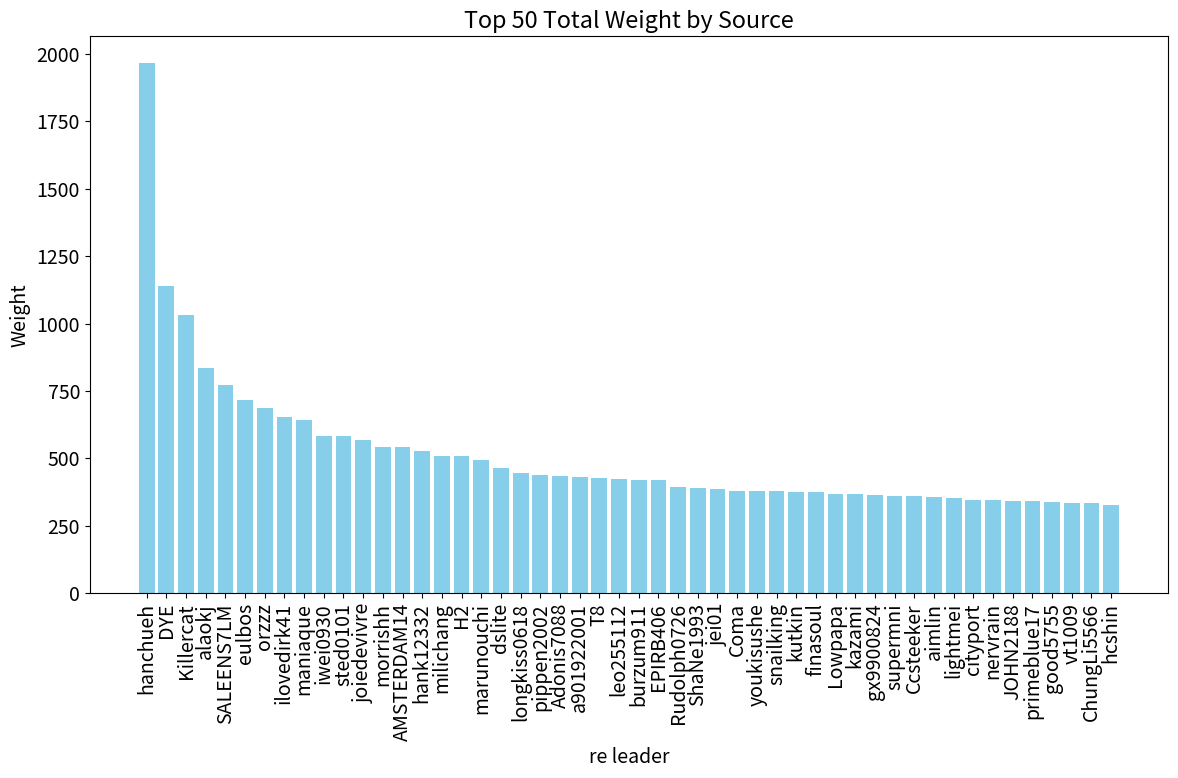

In [11]:
# 只選擇前50個
top_50_df = grouped_df.head(50)

# 繪製長條圖
plt.figure(figsize=(12, 8))
plt.bar(top_50_df['src'], top_50_df['weight'], color='skyblue')
plt.xlabel('re leader')
plt.ylabel('Weight')
plt.title('Top 50 Total Weight by Source')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 只保留前1O位意見領袖的回文

In [72]:
# 根據權重進行排序並選取前10名
top_src = grouped_df.sort_values(by='weight', ascending=False).head(1)['src']

# 根據前10名留言者篩選出文章
re_leader_df = re_df[re_df['src'].isin(top_src)]

re_leader_df

src                                                dis  weight
41599  hanchueh  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....       5
41600  hanchueh  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....       5
41601  hanchueh  https://www.ptt.cc/bbs/car/M.1685943094.A.AE4....       6
41602  hanchueh  https://www.ptt.cc/bbs/car/M.1686035893.A.1A8....       4
41603  hanchueh  https://www.ptt.cc/bbs/car/M.1686042363.A.469....       2
...         ...                                                ...     ...
41916  hanchueh  https://www.ptt.cc/bbs/car/M.1710574822.A.62A....      15
41917  hanchueh  https://www.ptt.cc/bbs/car/M.1710650059.A.C98....      26
41918  hanchueh  https://www.ptt.cc/bbs/car/M.1710722456.A.AC5....      14
41919  hanchueh  https://www.ptt.cc/bbs/car/M.1710763298.A.B17....       5
41920  hanchueh  https://www.ptt.cc/bbs/car/M.1713412405.A.EEC....       1

[322 rows x 3 columns]

In [75]:
# 設定分數低的為紅色
def getColor(w):
  if w>0:
    return 'green'
  else:
    return 'red'

re_leader_df.loc[:, 'color'] = re_leader_df.weight.map(getColor)
re_leader_df

src                                                dis  weight  \
41599  hanchueh  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....       5   
41600  hanchueh  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....       5   
41601  hanchueh  https://www.ptt.cc/bbs/car/M.1685943094.A.AE4....       6   
41602  hanchueh  https://www.ptt.cc/bbs/car/M.1686035893.A.1A8....       4   
41603  hanchueh  https://www.ptt.cc/bbs/car/M.1686042363.A.469....       2   
...         ...                                                ...     ...   
41916  hanchueh  https://www.ptt.cc/bbs/car/M.1710574822.A.62A....      15   
41917  hanchueh  https://www.ptt.cc/bbs/car/M.1710650059.A.C98....      26   
41918  hanchueh  https://www.ptt.cc/bbs/car/M.1710722456.A.AC5....      14   
41919  hanchueh  https://www.ptt.cc/bbs/car/M.1710763298.A.B17....       5   
41920  hanchueh  https://www.ptt.cc/bbs/car/M.1713412405.A.EEC....       1   

       color  
41599  green  
41600  green  
41601  green  
41602  green  
41603  green  
...      ...  
41916  green  
41917  green  
41918  green  
41919  green  
41920  green  

[322 rows x 4 columns]

## 製作網路圖

In [81]:
# 人為綠色節點
# po文為橘色節點

# 建立一個網路圖
netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)
# 所有發文者＋留言者
person = list(set(re_leader_df.src.unique().tolist()))
url = po_df[po_df['dis'].isin(re_leader_df['dis'])]['dis'].unique().tolist()

# 加入節點（人）
netWork.add_nodes(
    nodes = person,
    value = [1 for i in range(len(person))],
    color = ['#66CDAA' for i in range(len(person))],
    title = person
)
# 加入節點（文章）
netWork.add_nodes(
    nodes = url,
    value = [2 for i in range(len(url))],
    color = ['#FFB366' for i in range(len(url))],
    title = url
)

# 加入邊（文章 -> 留言者），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
for i in re_leader_df.to_numpy():
    if i[1] in url and i[0] in person:
        netWork.add_edge(i[1], i[0], width=2, color=getColor(i[2]))

# 設定layout，圖節點之間的斥力
netWork.repulsion()

# netWork.show("./basic_netWork.html")
netWork.save_graph("./basic_netWork.html")
IPython.display.HTML('basic_netWork.html')

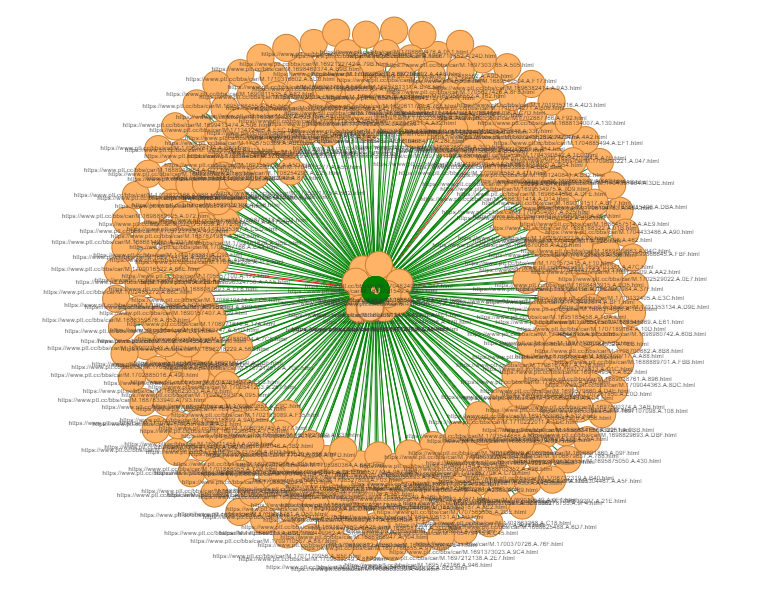

## 製作網路圖2

### 只保留前50位意見領袖的回文且權重>10

In [12]:
# 根據權重進行排序並選取前10名
top_src = grouped_df.sort_values(by='weight', ascending=False).head(50)['src']

# 根據前50名留言者篩選出文章
re_leader_df = re_df[re_df['src'].isin(top_src)]

re_leader_df = re_leader_df[re_leader_df['weight'] > 10]

re_leader_df

src                                                dis  weight
537    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1689080380.A.6B2....      22
617    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1703432225.A.581....      20
626    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1704726662.A.78B....      20
676    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1709633299.A.08B....      18
3143     Ccsteeker  https://www.ptt.cc/bbs/car/M.1686124734.A.F99....      18
...            ...                                                ...     ...
81399   youkisushe  https://www.ptt.cc/bbs/car/M.1710763298.A.B17....      18
81401   youkisushe  https://www.ptt.cc/bbs/car/M.1711004232.A.EF8....      11
81421   youkisushe  https://www.ptt.cc/bbs/car/M.1713155518.A.577....      18
81430   youkisushe  https://www.ptt.cc/bbs/car/M.1715336570.A.C30....      11
81437   youkisushe  https://www.ptt.cc/bbs/car/M.1715739360.A.809....      15

[290 rows x 3 columns]

In [12]:
# 根據權重進行排序並選取前10名
top_src = grouped_df.sort_values(by='weight', ascending=False).head(50)['src']

# 根據前50名留言者篩選出文章
re_leader_df = re_df[re_df['src'].isin(top_src)]

re_leader_df = re_leader_df[re_leader_df['weight'] > 10]

re_leader_df

src                                                dis  weight
537    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1689080380.A.6B2....      22
617    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1703432225.A.581....      20
626    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1704726662.A.78B....      20
676    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1709633299.A.08B....      18
3143     Ccsteeker  https://www.ptt.cc/bbs/car/M.1686124734.A.F99....      18
...            ...                                                ...     ...
81399   youkisushe  https://www.ptt.cc/bbs/car/M.1710763298.A.B17....      18
81401   youkisushe  https://www.ptt.cc/bbs/car/M.1711004232.A.EF8....      11
81421   youkisushe  https://www.ptt.cc/bbs/car/M.1713155518.A.577....      18
81430   youkisushe  https://www.ptt.cc/bbs/car/M.1715336570.A.C30....      11
81437   youkisushe  https://www.ptt.cc/bbs/car/M.1715739360.A.809....      15

[290 rows x 3 columns]

In [12]:
# 設定分數低的為紅色
def getColor(w):
  if w>0:
    return 'green'
  else:
    return 'red'

re_leader_df.loc[:, 'color'] = re_leader_df.weight.map(getColor)
re_leader_df

src                                                dis  weight  \
537    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1689080380.A.6B2....      22   
617    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1703432225.A.581....      20   
626    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1704726662.A.78B....      20   
676    AMSTERDAM14  https://www.ptt.cc/bbs/car/M.1709633299.A.08B....      18   
3143     Ccsteeker  https://www.ptt.cc/bbs/car/M.1686124734.A.F99....      18   
...            ...                                                ...     ...   
81399   youkisushe  https://www.ptt.cc/bbs/car/M.1710763298.A.B17....      18   
81401   youkisushe  https://www.ptt.cc/bbs/car/M.1711004232.A.EF8....      11   
81421   youkisushe  https://www.ptt.cc/bbs/car/M.1713155518.A.577....      18   
81430   youkisushe  https://www.ptt.cc/bbs/car/M.1715336570.A.C30....      11   
81437   youkisushe  https://www.ptt.cc/bbs/car/M.1715739360.A.809....      15   

       color  
537    green  
617    green  
626    green  
676    green  
3143   green  
...      ...  
81399  green  
81401  green  
81421  green  
81430  green  
81437  green  

[290 rows x 4 columns]

In [14]:
# 人為綠色節點
# po文為橘色節點

# 建立一個網路圖
netWork = pyvis.network.Network(notebook=True, cdn_resources='in_line',directed=True)
# 所有發文者＋留言者
person = list(set(re_leader_df.src.unique().tolist()))
url = po_df[po_df['dis'].isin(re_leader_df['dis'])]['dis'].unique().tolist()

# 加入節點（人）
netWork.add_nodes(
    nodes = person,
    value = [1 for i in range(len(person))],
    color = ['#66CDAA' for i in range(len(person))],
    title = person
)
# 加入節點（文章）
netWork.add_nodes(
    nodes = url,
    value = [2 for i in range(len(url))],
    color = ['#FFB366' for i in range(len(url))],
    title = url
)

# 加入邊（文章 -> 留言者），顏色為某發文者對該文章的總分（>0:綠; <=0:紅）
for i in re_leader_df.to_numpy():
    if i[1] in url and i[0] in person:
        netWork.add_edge(i[1], i[0], width=2, color=getColor(i[2]))

# 設定layout，圖節點之間的斥力
netWork.repulsion()

# netWork.show("./basic_netWork.html")
netWork.save_graph("./basic_netWork.html")
IPython.display.HTML('basic_netWork.html')

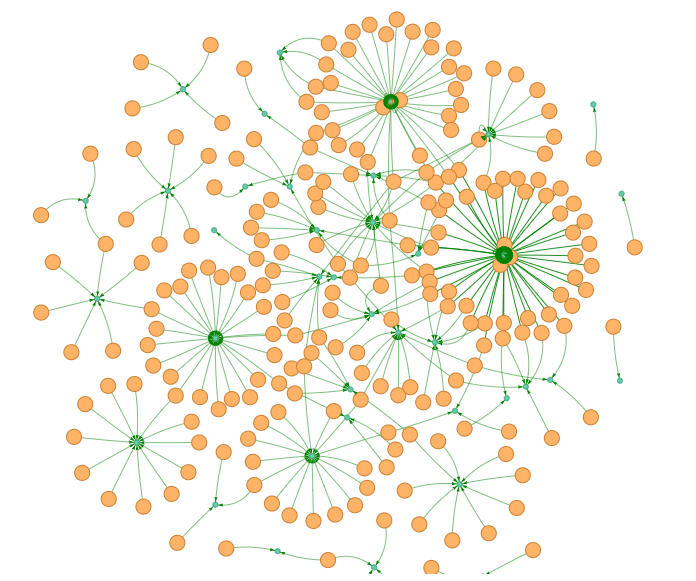

## 網友之間的關係

In [41]:
pos_cmt = socail_data.copy()
pos_cmt = pos_cmt[~pos_cmt.artComter.isna()]
pos_cmt.head(10)

artUrl    artPoster  \
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   
105  https://www.ptt.cc/bbs/car/M.1686228716.A.CA2....  AMSTERDAM14   

       artComter artStatus  
105   SALEENS7LM         推  
105  AMSTERDAM14         →  
105  AMSTERDAM14         →  
105     SungHyun         推  
105    bruce2248         →  
105    bruce2248         →  
105    bruce2248         →  
105    ga3322165         噓  
105    ga3322165         →  
105    ga3322165         →

In [42]:
pos_cmt['score'] = pos_cmt['artStatus'].apply(lambda r: convertStatus(r))

top_src = grouped_df.sort_values(by='weight', ascending=False).head(50)['src']
pos_cmt = pos_cmt[pos_cmt['artComter'].isin(top_src)]

# 某留言者對某發文者的總分
pos_cmt = pos_cmt.groupby(['artComter','artPoster']).sum('score').reset_index()
pos_cmt = pos_cmt[pos_cmt.score>=20]
pos_cmt = pos_cmt[pos_cmt.artComter != pos_cmt.artPoster]
# pos_cmt.score = 1
pos_cmt

artComter     artPoster  score
24    AMSTERDAM14    SincereBob     20
61    AMSTERDAM14        eulbos     32
119   AMSTERDAM14  superplayer5     20
125   AMSTERDAM14        tokeep     22
291     Ccsteeker  encoreb00124     26
...           ...           ...    ...
6111     sted0101       sazabik     24
6140     sted0101     yun0615ch     23
6233       vt1009           a1e     33
6398   youkisushe    usnavyseal     20
6403   youkisushe        yokann     22

[146 rows x 3 columns]

In [43]:
mat = pd.pivot_table(pos_cmt,index = 'artComter', columns = 'artPoster' ,values='score').fillna(0)
mat

artPoster    AMSTERDAM14  DUOWT    H2  Holmes7  ITer  JQK2  Kidd00  KingKunta  \
artComter                                                                       
AMSTERDAM14          0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
Ccsteeker            0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
Coma                 0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
DYE                 65.0    0.0  52.0      0.0   0.0   0.0     0.0        0.0   
EPIRB406             0.0    0.0  22.0      0.0   0.0   0.0     0.0        0.0   
H2                  45.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
JOHN2188             0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
Killercat            0.0    0.0  39.0      0.0   0.0   0.0     0.0        0.0   
SALEENS7LM           0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
T8                   0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
aimlin               0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
alaokj               0.0    0.0   0.0      0.0  22.0   0.0     0.0        0.0   
burzum911            0.0    0.0   0.0     56.0   0.0   0.0     0.0        0.0   
cityport             0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
eulbos              23.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
good5755             0.0    0.0  26.0      0.0   0.0   0.0     0.0        0.0   
hanchueh             0.0   21.0  96.0      0.0   0.0  24.0     0.0       23.0   
hank12332            0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
hcshin               0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
ilovedirk41         31.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
iwei0930             0.0    0.0  22.0      0.0   0.0   0.0     0.0      143.0   
joiedevivre          0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
kazami               0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
kutkin               0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
maniaque             0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
marunouchi           0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
milichang            0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
morrishh             0.0    0.0   0.0      0.0   0.0   0.0    28.0        0.0   
nervrain             0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
orzzz                0.0    0.0  21.0      0.0   0.0   0.0     0.0        0.0   
sted0101             0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
vt1009               0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   
youkisushe           0.0    0.0   0.0      0.0   0.0   0.0     0.0        0.0   

artPoster    LimYoHwan  Mapleton  ...  wangrg  wearebest  werttrew  xcgt2003  \
artComter                         ...                                          
AMSTERDAM14        0.0       0.0  ...     0.0        0.0       0.0       0.0   
Ccsteeker          0.0       0.0  ...     0.0        0.0       0.0       0.0   
Coma               0.0       0.0  ...     0.0        0.0       0.0       0.0   
DYE                0.0       0.0  ...    22.0        0.0       0.0       0.0   
EPIRB406           0.0       0.0  ...     0.0        0.0       0.0       0.0   
H2                 0.0       0.0  ...     0.0        0.0       0.0       0.0   
JOHN2188           0.0       0.0  ...     0.0        0.0       0.0       0.0   
Killercat         21.0      31.0  ...     0.0        0.0       0.0       0.0   
SALEENS7LM         0.0       0.0  ...     0.0        0.0       0.0       0.0   
T8                 0.0       0.0  ...     0.0        0.0       0.0       0.0   
aimlin             0.0       0.0  ...     0.0        0.0       0.0       0.0   
alaokj             0.0       0.0  ...     0.0        0.0       0.0       0.0   
burzum911          0.0       0.0  ...     0.

### 計算網友之間的分數矩陣
 + mat: 有方向性，A -> B 分數與 B -> A 分數不一定一樣。
 + mat_s: 無方向性（互動總分），A -> B 分數 + B -> A 分數

In [44]:
# 所有留言者與發文者
pers = np.unique(pos_cmt[['artComter', 'artPoster']])

# 建立評分矩陣（留言者對發文者分數）
# 取得所有人對於其他人的分數（有方向性）
# 矩陣中的值 mat[i][j] 代表使用者 pers[i]（留言者）對使用者 pers[j]（發文者）的評分，
    # 留言者和發文者之間的關係是有方向的（即，mat[i][j] 不一定等於 mat[j][i]）
mat = pd.pivot_table(pos_cmt,index = 'artPoster', columns = 'artComter' ,values='score' ).fillna(0)\
  .reindex(columns=pers, index=pers, fill_value=0).to_numpy()
print(mat.shape)

# 取得所有人與其他人互動分數總和（無方向，兩個方向分數相加）
# 矩陣中的每一對元素都對稱，即 mat_s[i][j] 等於 mat_s[j][i]
# 對稱矩陣中的值 mat_s[i][j] 表示使用者 pers[i] 與使用者 pers[j] 之間的互動總分。
    # 透過將 pers[i] 對 pers[j] 的評分和 pers[j] 對 pers[i] 的評分相加而得到的。
# np.tril(mat, -1): 生成一個下三角矩陣（包括主對角線下方的所有元素，但不包括主對角線上的元素）
# np.triu(mat, 1): 生成一個上三角矩陣（包括主對角線上方的所有元素，但不包括主對角線上的元素）
tri = (np.tril(mat,-1).T + np.triu(mat,1))
mat_s = tri+tri.T # 上三角和下三角都包括在內，但對角線是 0
mat_s

(121, 121)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
# 產生隨機的顏色，畫圖使用
def random_color():
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(), r(), r())

def get_edge_color(weight, vmin, vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.get_cmap('RdYlGn_r')  # 使用紅-黃-綠的反轉colormap
    return mcolors.to_hex(cmap(norm(weight)))

def matPresentGraph(mat: np.array, node_id: list, node_type: list = None, node_value: list = None, directed=True) -> pyvis.network.Network:
    # 有方向或無方向
    if not directed:
        # 矩陣對稱
        if (mat == mat.transpose()).all():
            print('matrix is Symmetric')
        # 矩陣不對稱
        else:
            print('matrix is not Symmetric')

    # 設定節點的類別及顏色
    # 沒有分節點類別
    if node_type is None:
        c = random_color()
        node_colors = [c for _ in range(len(node_id))]
        node_type = [" " for _ in range(len(node_id))]
    # 有分節點類別
    else:
        node_color_map = {}
        for i in set(node_type):
            # 幫每個類別產生一個顏色
            while True:
                c = random_color()
                if c not in node_color_map.values():
                    break
            node_color_map[i] = c
        node_colors = [node_color_map[i] for i in node_type]

    # 如果沒有給 node 值，就都分配 1
    if node_value is None:
        node_value = [1 for _ in range(len(node_id))]

    # 建立圖
    net = pyvis.network.Network(notebook=True, directed=directed, cdn_resources='in_line')

    titles_list = []
    for i, j in zip(node_id, node_type):
        titles_list.append(f"{i}:{j}")

    net.add_nodes(
        nodes=node_id,
        value=node_value,
        label=node_id,
        title=titles_list,
        color=node_colors
    )

    vmin, vmax = mat.min(), mat.max()
    for row in range(len(node_id)):
        for col in range(len(node_id)):
            if mat[row][col] > 0.:
                edge_color = get_edge_color(mat[row][col], vmin=vmin, vmax=vmax)
                net.add_edge(
                    node_id[row], node_id[col], width=2, color=edge_color, title=mat[row][col]  # 固定箭頭寬度為2
                )
    net.repulsion()
    return net

### 設定網友的節點類型（同時為發文、留言者 / 發文者 / 留言者）

In [53]:
# 定義發文者（po）、評論者(cmt)、兩者兼具(both)
node_type = []

cmt_list = pos_cmt['artComter'].unique().tolist()
po_list = pos_cmt['artPoster'].unique().tolist()
both_list = list(set(cmt_list) & set(po_list))
for p in pers:
  if p in both_list:
    node_type.append('both')

  elif p in cmt_list:
    node_type.append('cmt')

  elif p in po_list:
    node_type.append('po')

In [54]:
net = matPresentGraph(mat=mat, node_id=pers, node_type=node_type)
net.save_graph("./pers_netWork.html")
IPython.display.HTML('pers_netWork.html')

前10個意見領導與網友關係圖

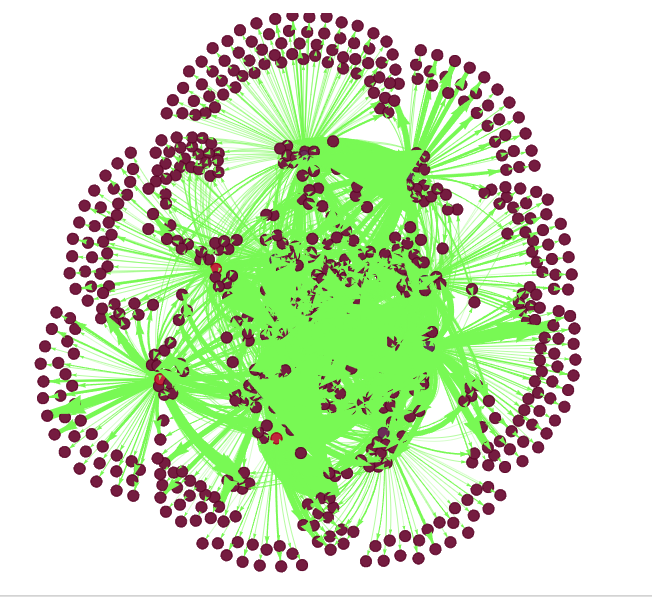

前3個意見領導與網友關係圖

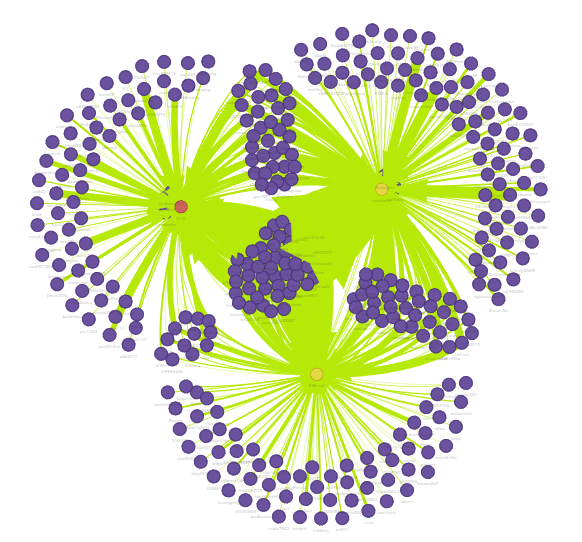

前50個意見領導與網友關係圖，且總分大於10

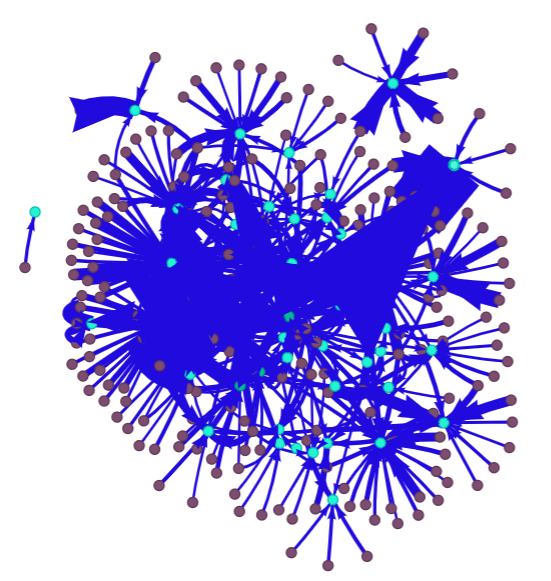

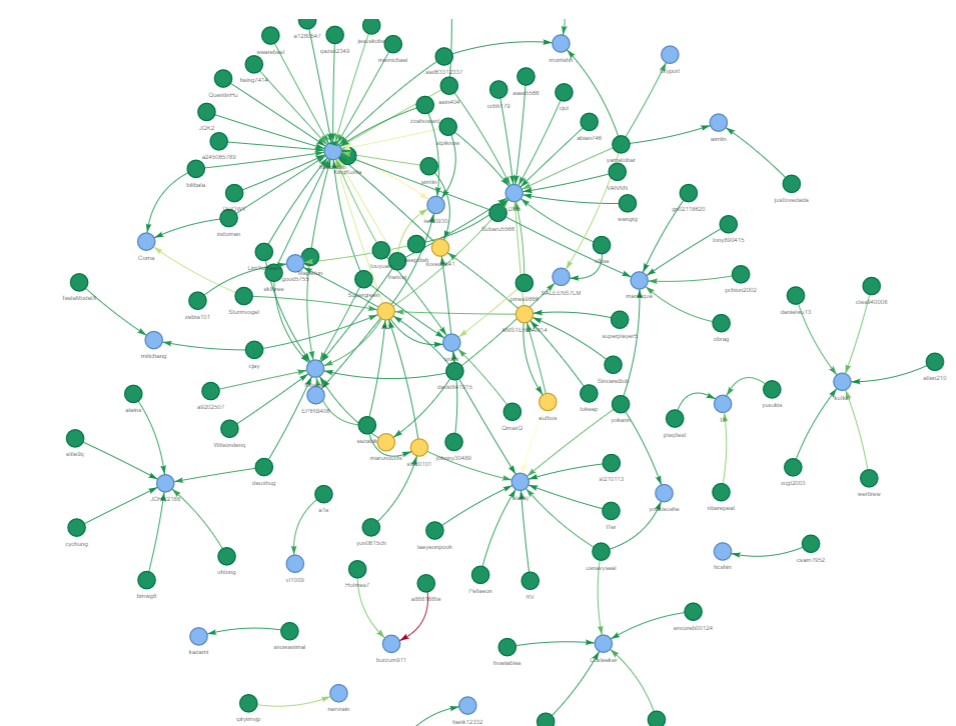

我們可以發現有評論越多文章的人，越為意見領袖，重要程度愈高（節點越大）

## Hits score （有向圖）

In [60]:
# nx.hits 計算圖中每個節點的 Hub 和 Authority 值。 HITS 演算法將每個節點分為兩種角色：
    # Hub： 一個好的 Hub 節點連結到許多 Authority 節點。
    # Authority： 一個好的 Authority 節點被許多 Hub 節點連結到。

# out_：每個節點的 Hub 值。
# in_：每個節點的 Authority 值。

out_,in_ = nx.hits(nx.DiGraph(mat),max_iter=100)

In [61]:
out_ = np.array(list(out_.values()))
out_q = np.quantile(out_,[.2,.4,.6,.8])
out_q

array([0.00000000e+00, 2.99353627e-06, 4.08450908e-04, 1.54182420e-02])

In [62]:
in_ = np.array(list(in_.values()))
in_q = np.quantile(in_,[.2,.4,.6,.8])
in_q

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.53831032e-05])

In [63]:
node_value = []

# 根據 Hub 值設定節點大小
for i in out_:
  if i > out_q[3]:
    node_value.append(25)
  elif i >out_q[2]:
    node_value.append(20)
  elif i>out_q[1]:
    node_value.append(15)
  elif i>out_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.save_graph("./pers_out_netWork.html")
IPython.display.HTML('pers_out_netWork.html')

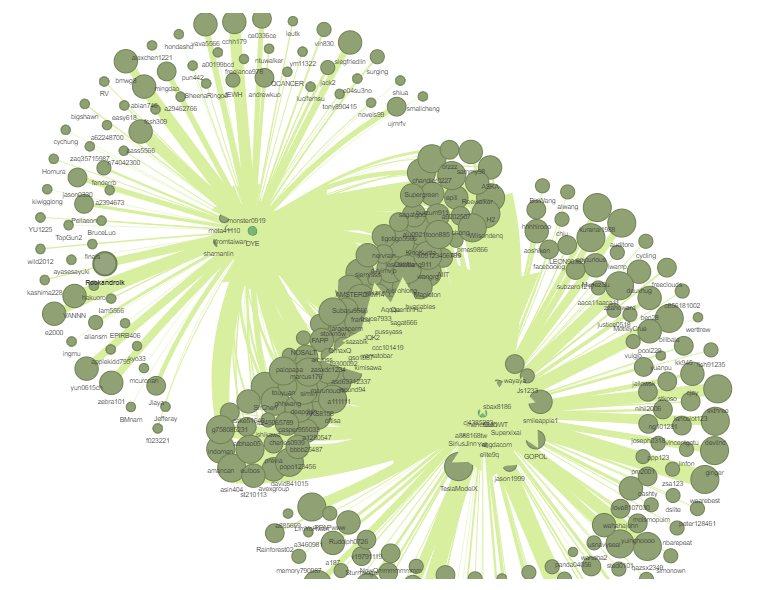

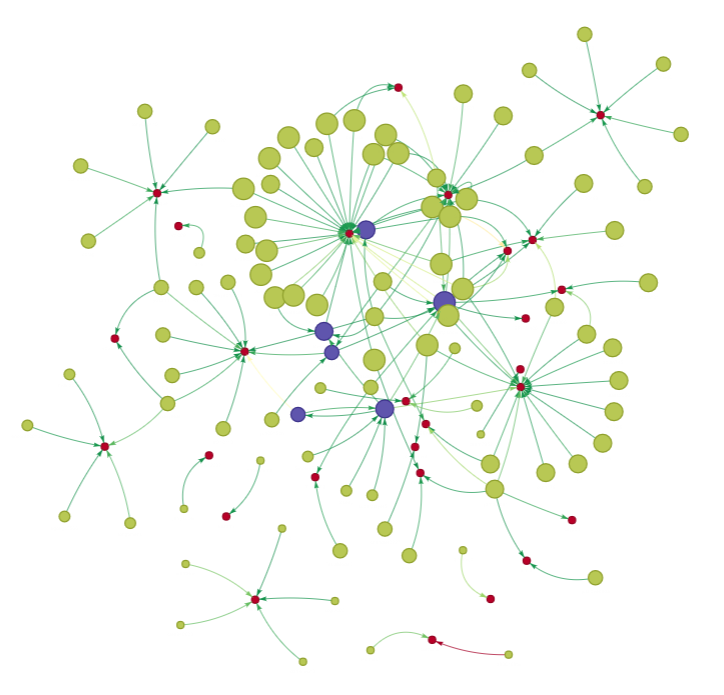

In [64]:
node_value = []

# 根據 Authority 值設定節點大小
for i in in_:
  if i > in_q[3]:
    node_value.append(25)
  elif i >in_q[2]:
    node_value.append(20)
  elif i>in_q[1]:
    node_value.append(15)
  elif i>in_q[0]:
    node_value.append(10)
  else:
    node_value.append(5)

net = matPresentGraph(mat = mat,node_id = pers,node_type = node_type,node_value=node_value)
net.save_graph("./pers_in_netWork.html")
IPython.display.HTML('pers_in_netWork.html')

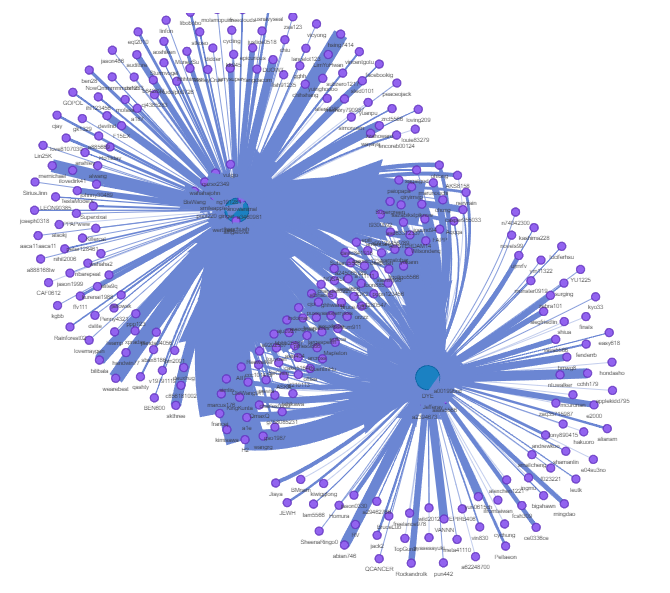

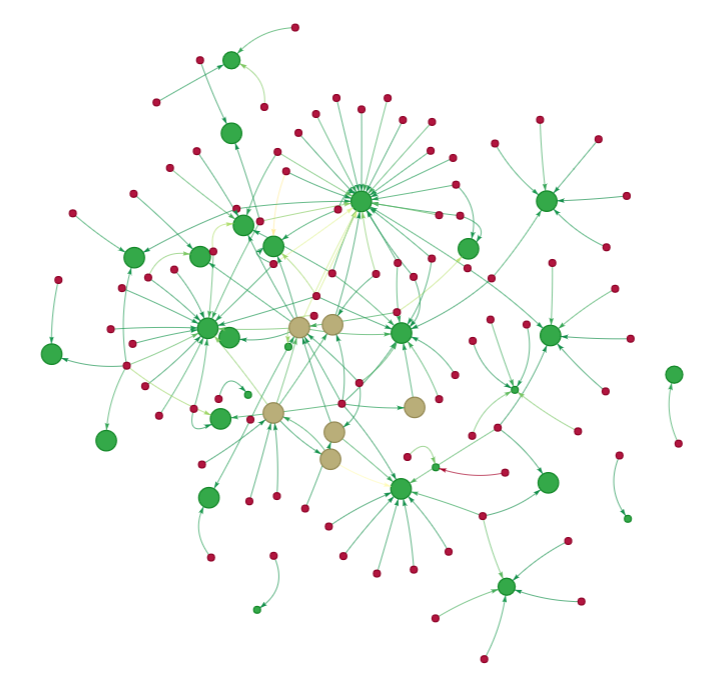

## Car_shop

In [14]:
car_shop_raw_data = pd.read_csv('./car_shop.csv')
car_shop_raw_data = car_shop_raw_data[car_shop_raw_data.artComment != '[]']
car_shop_raw_data = car_shop_raw_data.sample(round(car_shop_raw_data.shape[0]/4), random_state=2024)
print(car_shop_raw_data.shape)
car_shop_raw_data.head()

(626, 11)


system_id                                             artUrl  \
2673       2674  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   
3225       3226  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....   
1180       1181  https://www.ptt.cc/bbs/CarShop/M.1696863516.A....   
1365       1366  https://www.ptt.cc/bbs/CarShop/M.1698300784.A....   
2231       2232  https://www.ptt.cc/bbs/CarShop/M.1704262006.A....   

                            artTitle              artDate artPoster  \
2673           [售車]2014GolfMK71.2TSI  2024-02-19 13:20:46   irarref   
3225    [售車]2015SubaruForester森林人2.0  2024-04-11 10:32:06  hn706073   
1180  [售車]2012/11FordFocus4DMK31.6銀色  2023-10-09 22:58:34   cucuboa   
1365                    [售車]mini2011  2023-10-26 14:13:02      GBRL   
2231   [售車]三菱MitsubishiOutlander2010  2024-01-03 14:06:44  largebra   

     artCatagory                                         artContent  \
2673     CarShop  車輛品牌/產地/出廠年月：　VW  Golf 2014年3月\n\n車款型式/排氣量：120...   
3225     CarShop  車輛品牌/產地/出廠年月：2015年3月出廠，2015年7月領牌\n\n車款型式/排氣量：F...   
1180     CarShop  車輛品牌/產地/出廠年月：Ford Focus MK3 /2012.11\n\n車款型式/排...   
1365     CarShop  車輛品牌/產地/出廠年月：Mini  Cooper 2011年05月\n\n車款型式/排氣量...   
2231     CarShop  車輛品牌/產地/出廠年月：　Mitsubishi Outlander 2010年9月\n\n...   

                                             artComment            e_ip  \
2673  [{"cmtStatus": "推", "cmtPoster": "frogKFS", "c...    42.77.31.248   
3225  [{"cmtStatus": "→", "cmtPoster": "NOCHINA", "c...  49.216.166.244   
1180  [{"cmtStatus": "噓", "cmtPoster": "cs1992209", ...   36.234.120.21   
1365  [{"cmtStatus": "推", "cmtPoster": "TMDHS", "cmt...    42.72.45.203   
2231  [{"cmtStatus": "推", "cmtPoster": "WORLDKING56"...  125.229.96.193   

             insertedDate dataSource  
2673  2024-02-20 01:06:16        ptt  
3225  2024-04-12 01:08:27        ptt  
1180  2023-10-10 01:05:49        ptt  
1365  2023-10-27 01:05:36        ptt  
2231  2024-01-04 01:05:48        ptt

In [15]:
# parse comment
# 處理某篇文章的所有留言（取出留言者與狀態）
def getComtInfo(com):
  cmters,cmt_statuss = [],[]
  com = eval(com)
  for i in com:
    # print(i)
    cmters.append(i['cmtPoster'])
    cmt_statuss.append(i['cmtStatus'])
  return pd.Series([cmters, cmt_statuss])

car_shop_raw_data[['artComter','artStatus']] = car_shop_raw_data['artComment'].apply(lambda r: getComtInfo(r))
car_shop_raw_data.head()

system_id                                             artUrl  \
2673       2674  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   
3225       3226  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....   
1180       1181  https://www.ptt.cc/bbs/CarShop/M.1696863516.A....   
1365       1366  https://www.ptt.cc/bbs/CarShop/M.1698300784.A....   
2231       2232  https://www.ptt.cc/bbs/CarShop/M.1704262006.A....   

                            artTitle              artDate artPoster  \
2673           [售車]2014GolfMK71.2TSI  2024-02-19 13:20:46   irarref   
3225    [售車]2015SubaruForester森林人2.0  2024-04-11 10:32:06  hn706073   
1180  [售車]2012/11FordFocus4DMK31.6銀色  2023-10-09 22:58:34   cucuboa   
1365                    [售車]mini2011  2023-10-26 14:13:02      GBRL   
2231   [售車]三菱MitsubishiOutlander2010  2024-01-03 14:06:44  largebra   

     artCatagory                                         artContent  \
2673     CarShop  車輛品牌/產地/出廠年月：　VW  Golf 2014年3月\n\n車款型式/排氣量：120...   
3225     CarShop  車輛品牌/產地/出廠年月：2015年3月出廠，2015年7月領牌\n\n車款型式/排氣量：F...   
1180     CarShop  車輛品牌/產地/出廠年月：Ford Focus MK3 /2012.11\n\n車款型式/排...   
1365     CarShop  車輛品牌/產地/出廠年月：Mini  Cooper 2011年05月\n\n車款型式/排氣量...   
2231     CarShop  車輛品牌/產地/出廠年月：　Mitsubishi Outlander 2010年9月\n\n...   

                                             artComment            e_ip  \
2673  [{"cmtStatus": "推", "cmtPoster": "frogKFS", "c...    42.77.31.248   
3225  [{"cmtStatus": "→", "cmtPoster": "NOCHINA", "c...  49.216.166.244   
1180  [{"cmtStatus": "噓", "cmtPoster": "cs1992209", ...   36.234.120.21   
1365  [{"cmtStatus": "推", "cmtPoster": "TMDHS", "cmt...    42.72.45.203   
2231  [{"cmtStatus": "推", "cmtPoster": "WORLDKING56"...  125.229.96.193   

             insertedDate dataSource  \
2673  2024-02-20 01:06:16        ptt   
3225  2024-04-12 01:08:27        ptt   
1180  2023-10-10 01:05:49        ptt   
1365  2023-10-27 01:05:36        ptt   
2231  2024-01-04 01:05:48        ptt   

                                              artComter           artStatus  
2673  [frogKFS, goshnash, kingshapo, idletime, frogK...  [推, →, 推, 推, 推, 推]  
3225   [NOCHINA, hn706073, aafish, baritone7563, gust1]     [→, →, →, 推, 推]  
1180           [cs1992209, corolla16, cucuboa, cucuboa]        [噓, 噓, →, →]  
1365                                            [TMDHS]                 [推]  
2231                                      [WORLDKING56]                 [推]

In [16]:
car_shop_raw_data = car_shop_raw_data.explode(['artComter','artStatus'])
car_shop_socail_data = car_shop_raw_data[['artUrl','artPoster','artComter','artStatus']]
car_shop_socail_data.head(10)

artUrl artPoster  \
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
2673  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....   irarref   
3225  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....  hn706073   
3225  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....  hn706073   
3225  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....  hn706073   
3225  https://www.ptt.cc/bbs/CarShop/M.1712802728.A....  hn706073   

         artComter artStatus  
2673       frogKFS         推  
2673      goshnash         →  
2673     kingshapo         推  
2673      idletime         推  
2673       frogKFS         推  
2673        DUFTON         推  
3225       NOCHINA         →  
3225      hn706073         →  
3225        aafish         →  
3225  baritone7563         推

In [17]:
car_shop_socail_data.artStatus.unique()

array(['推', '→', '噓'], dtype=object)

In [18]:
# 發文者對文章
car_shop_po_df = car_shop_socail_data[['artPoster','artUrl']].drop_duplicates().rename(columns = {'artPoster':'src','artUrl':'dis'})

# sample 100 篇文章
# random.seed(2024)
# sample_url = random.choices(po_df.dis.unique().tolist(),k=100)
# po_df = po_df[po_df.dis.isin(sample_url)]

# 留言者對文章，狀態為 weight
car_shop_re_df = car_shop_socail_data[['artComter','artUrl','artStatus']].rename(columns = {'artComter':'src','artUrl':'dis','artStatus':'weight'})
# re_df = re_df[re_df.dis.isin(sample_url)]
car_shop_re_df = car_shop_re_df[~car_shop_re_df['src'].isna()]
car_shop_re_df.head()

src                                                dis weight
2673    frogKFS  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....      推
2673   goshnash  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....      →
2673  kingshapo  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....      推
2673   idletime  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....      推
2673    frogKFS  https://www.ptt.cc/bbs/CarShop/M.1708320048.A....      推

In [19]:
# 轉換邊的狀態 -> weight
def convertStatus(s):
  if s == '推':
    return 2
  elif s == '→':
    return 1
  else :
    return -1
car_shop_re_df['weight'] = car_shop_re_df['weight'].map(convertStatus)
# 計算某位留言者對某篇文章的總分數
car_shop_re_df = car_shop_re_df.groupby(['src','dis']).sum().reset_index()
car_shop_re_df

src                                                dis  weight
0           A15  https://www.ptt.cc/bbs/CarShop/M.1701326367.A....       2
1     AEGIS1106  https://www.ptt.cc/bbs/CarShop/M.1707145599.A....       2
2     AJjimchen  https://www.ptt.cc/bbs/CarShop/M.1688563446.A....       3
3         ALOWS  https://www.ptt.cc/bbs/CarShop/M.1686625955.A....       2
4         ALOWS  https://www.ptt.cc/bbs/CarShop/M.1687746822.A....      -1
...         ...                                                ...     ...
3113  zx2751206  https://www.ptt.cc/bbs/CarShop/M.1691286073.A....       2
3114  zx2751206  https://www.ptt.cc/bbs/CarShop/M.1701173033.A....       4
3115  zx2751206  https://www.ptt.cc/bbs/CarShop/M.1713012871.A....       4
3116      zyfan  https://www.ptt.cc/bbs/CarShop/M.1713544194.A....      -1
3117      zzlzz  https://www.ptt.cc/bbs/CarShop/M.1686836137.A....       2

[3118 rows x 3 columns]

In [20]:
# 以 src 為群組計算 weight 的總和
car_shop_grouped_df = car_shop_re_df.groupby('src')['weight'].sum().reset_index()

# 根據 weight 進行排序
car_shop_grouped_df = car_shop_grouped_df.sort_values(by='weight', ascending=False).reset_index(drop=True)

# 顯示結果
car_shop_grouped_df

src  weight
0     baritone7563     116
1          skthree      93
2         junsport      83
3        sjerrysss      82
4          seanfan      69
...            ...     ...
1373   yamo1232000      -1
1374     s3030oioi      -1
1375     cs1992209      -2
1376      sonic031      -5
1377     corolla16      -6

[1378 rows x 2 columns]

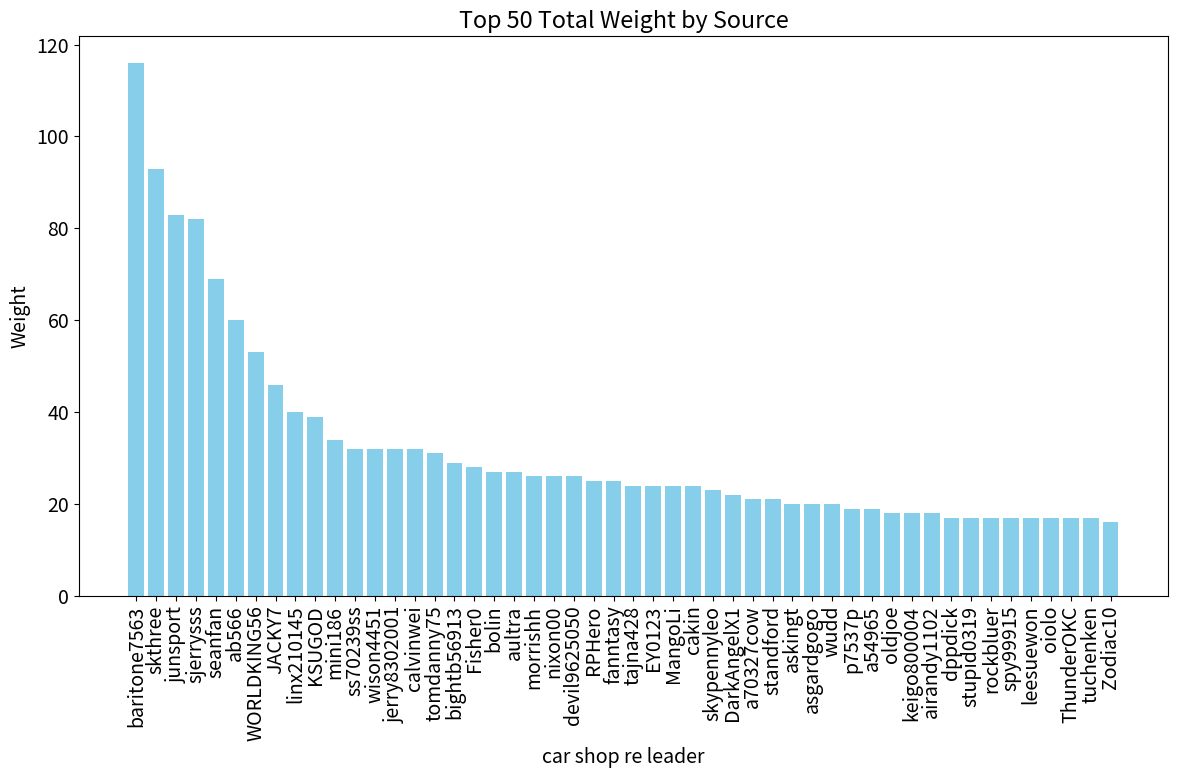

In [22]:
# 只選擇前50個
car_shop_top_50_df = car_shop_grouped_df.head(50)

# 繪製長條圖
plt.figure(figsize=(12, 8))
plt.bar(car_shop_top_50_df['src'], car_shop_top_50_df['weight'], color='skyblue')
plt.xlabel('car shop re leader')
plt.ylabel('Weight')
plt.title('Top 50 Total Weight by Source')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
# 重命名列
car_shop_grouped_df = car_shop_grouped_df.rename(columns={'weight': 'car_shop_weight'})
grouped_df = grouped_df.rename(columns={'weight': 'car_weight'})

# 選取 car_shop_grouped_df 中 src 存在於 grouped_df 中的行
car_shop_and_car_grouped_df = car_shop_grouped_df[car_shop_grouped_df['src'].isin(grouped_df['src'])]

# 使用 merge 方法進行內連接
car_shop_and_car_grouped_df = car_shop_and_car_grouped_df.merge(grouped_df[['src', 'car_weight']], on='src', how='inner')

# 顯示結果
car_shop_and_car_grouped_df

src  car_shop_weight  car_weight
0    baritone7563              116         166
1         skthree               93         157
2       sjerrysss               82         243
3     WORLDKING56               53         173
4          JACKY7               46           9
..            ...              ...         ...
605     bboywhite               -1          32
606          ncdw               -1           8
607     cs1992209               -2           2
608      sonic031               -5           2
609     corolla16               -6           3

[610 rows x 3 columns]

# Bertopic

In [30]:
#載入資料
car_df = pd.read_csv("car.csv")
#去除沒有留言的資料
car_df = car_df[car_df.artComment != '[]']
car_df = car_df.dropna()
car_df

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
1             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
2             3  https://www.ptt.cc/bbs/car/M.1685929883.A.655....   
4             5  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....   
6             7  https://www.ptt.cc/bbs/car/M.1685936759.A.CD8....   
...         ...                                                ...   
8458       8459  https://www.ptt.cc/bbs/car/M.1717516269.A.9E5....   
8459       8460  https://www.ptt.cc/bbs/car/M.1717517574.A.A38....   
8460       8461  https://www.ptt.cc/bbs/car/M.1717518218.A.F7C....   
8461       8462  https://www.ptt.cc/bbs/car/M.1717518775.A.E0B....   
8462       8463  https://www.ptt.cc/bbs/car/M.1717518850.A.9C4....   

                       artTitle              artDate     artPoster  \
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39    Subaru5566   
1                          [分享]  2023-06-05 07:28:38       sazabik   
2      Re:[問題]Lexus是不保值還是只有這車款？  2023-06-05 09:51:21  jimmycatmeow   
4         [新聞]BMWi純電大軍台灣銷售持續奪冠！  2023-06-05 10:49:32   david841015   
6     Fw:[爆卦]高雄幼兒娃娃車闖紅燈疑似孩童坐在前座  2023-06-05 11:45:58    usnavyseal   
...                         ...                  ...           ...   
8458   [新聞]奧迪A5自撞四輪朝天居民盼加強取締改裝車  2024-06-04 23:51:04    hvariables   
8459    Re:[心得]他國事務FL5TypeR周年心得  2024-06-05 00:12:49        ttccnn   
8460    Re:[新聞]日本車廠「數據造假」多車款勒令停  2024-06-05 00:23:36      MarcTSLC   
8461   Re:[閒聊]subaru這牌子是發生什麼事了？  2024-06-05 00:32:53      kimisawa   
8462      [問題]對岸別克純電平台的電動車E4或E5  2024-06-05 00:34:08        hljjun   

     artCatagory                                         artContent  \
0            car  看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
1            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
2            car  我怎麼覺得相反….我2021年買最基礎版豪華訂價169折完價149。現在開了15000公里，...   
4            car  原文連結：\nhttps://racingcharger.tw/?p=40105\n原文內容...   
6            car  作者: usnavyseal (usmarine2008) 看板: Gossiping\n標...   
...          ...                                                ...   
8458         car  https://news.ltn.com.tw/news/Kaohsiung/breakin...   
8459         car  男人要說到做到 不能只剩一張嘴\n\n某天在論壇跟facebook上看到一組滿新的VOLK ...   
8460         car  昨天看到這篇新聞以後，我就想從各大媒體中，找這些品牌到底造假了什麼東西，畢竟這一\n次的風波...   
8461         car  我上週出差，Hertz給我一台 7人座的 ascent.\n開起來到蠻好開的。但我最不能接受...   
8462         car  如題\n\n聽說板上有些人喜歡說對岸的電動車是移動火葬場\n\n但美國別克在對岸推出的純電平...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
1     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...   36.230.135.169   
2     [{"cmtStatus": "推", "cmtPoster": "chingyun8245...  114.136.119.240   
4     [{"cmtStatus": "推", "cmtPoster": "lota", "cmtC...  111.240.103.113   
6     [{"cmtStatus": "推", "cmtPoster": "bill403777",...   36.231.183.229   
...                                                 ...              ...   
8458  [{"cmtStatus": "推", "cmtPoster": "kutkin", "cm...   61.230.132.222   
8459  [{"cmtStatus": "推", "cmtPoster": "gx9900824", ...     65.132.85.34   
8460  [{"cmtStatus": "推", "cmtPoster": "casco5566", ...   114.136.235.63   
8461  [{"cmtStatus": "推", "cmtPoster": "WiLLSTW", "c...    172.56.187.70   
8462  [{"cmtStatus": "→", "cmtPoster": "cityport", "...   111.251.185.24   

             insertedDate dataSource  
0     2023-06-06 01:05:00        ptt  
1     2023-06-06 01:05:00        ptt  
2     2023-06-06 01:05:00        ptt  
4     2023-06-06 01:05:00        ptt  
6     2023-06-06 01:05:00        ptt  
...                   ...        ...  
8458  2024-06-05 01:05:17        ptt  
8459  2024-06-05 01:05:17        ptt  
8460  2024-06-05 01:05:17        ptt  
8461  2024-06-05 01:05:17        ptt  
8462  2024-06-05 01:05:18        ptt  

[8248 rows x 11 columns]

### 找出回文者並且解析回文者回文的內容

In [11]:
# parse comment
# 處理某篇文章的所有留言（取出留言者 , 回文與狀態）
def getComtInfo(com):
  cmters,cmt_statuss,cmt_Content = [],[],[]
  com = eval(com)
  for i in com:
    cmters.append(i['cmtPoster'])
    cmt_statuss.append(i['cmtStatus'])
    cmt_Content.append(i['cmtContent'])
  return pd.Series([cmters, cmt_statuss,cmt_Content])

car_df[['artComter','artStatus','cmtContent']] = car_df['artComment'].apply(lambda r: getComtInfo(r))



In [12]:
#展開留言者，回文與狀態
raw_data = car_df.explode(['artComter','artStatus','cmtContent'])
raw_data

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
...         ...                                                ...   
8461       8462  https://www.ptt.cc/bbs/car/M.1717518775.A.E0B....   
8461       8462  https://www.ptt.cc/bbs/car/M.1717518775.A.E0B....   
8461       8462  https://www.ptt.cc/bbs/car/M.1717518775.A.E0B....   
8462       8463  https://www.ptt.cc/bbs/car/M.1717518850.A.9C4....   
8462       8463  https://www.ptt.cc/bbs/car/M.1717518850.A.9C4....   

                       artTitle              artDate   artPoster artCatagory  \
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39  Subaru5566         car   
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39  Subaru5566         car   
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39  Subaru5566         car   
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39  Subaru5566         car   
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39  Subaru5566         car   
...                         ...                  ...         ...         ...   
8461   Re:[閒聊]subaru這牌子是發生什麼事了？  2024-06-05 00:32:53    kimisawa         car   
8461   Re:[閒聊]subaru這牌子是發生什麼事了？  2024-06-05 00:32:53    kimisawa         car   
8461   Re:[閒聊]subaru這牌子是發生什麼事了？  2024-06-05 00:32:53    kimisawa         car   
8462      [問題]對岸別克純電平台的電動車E4或E5  2024-06-05 00:34:08      hljjun         car   
8462      [問題]對岸別克純電平台的電動車E4或E5  2024-06-05 00:34:08      hljjun         car   

                                             artContent  \
0     看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
0     看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
0     看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
0     看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
0     看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
...                                                 ...   
8461  我上週出差，Hertz給我一台 7人座的 ascent.\n開起來到蠻好開的。但我最不能接受...   
8461  我上週出差，Hertz給我一台 7人座的 ascent.\n開起來到蠻好開的。但我最不能接受...   
8461  我上週出差，Hertz給我一台 7人座的 ascent.\n開起來到蠻好開的。但我最不能接受...   
8462  如題\n\n聽說板上有些人喜歡說對岸的電動車是移動火葬場\n\n但美國別克在對岸推出的純電平...   
8462  如題\n\n聽說板上有些人喜歡說對岸的電動車是移動火葬場\n\n但美國別克在對岸推出的純電平...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
...                                                 ...              ...   
8461  [{"cmtStatus": "推", "cmtPoster": "WiLLSTW", "c...    172.56.187.70   
8461  [{"cmtStatus": "推", "cmtPoster": "WiLLSTW", "c...    172.56.187.70   
8461  [{"cmtStatus": "推", "cmtPoster": "WiLLSTW", "c...    172.56.187.70   
8462  [{"cmtStatus": "→", "cmtPoster": "cityport", "...   111.251.185.24   
8462  [{"cmtStatus": "→", "cmtPoster": "cityport", "...   111.251.185.24   

             insertedDate dataSource  artComter artStatus  \
0     2023-06-06 01:05:00        ptt    TopGun2         推   
0     2023-06-06 01:05:00        ptt       MK47         推   
0     2023-06-06 01:05:00        ptt       MK47         →   
0     2023-06-06 01:05:00        ptt   dalyadam         噓   
0     2023-06-06 01:05:00        ptt   dalyadam         噓   
...                   ...        ...        ...       ...   
8461  2024-06-05 01:05:17        ptt  hifrankya         推   
8461  2024-06-05 01:05:17        ptt  hifrankya         →   
8461  2024-06-05 01:05:17        

In [17]:
#先將結果存成csv檔
raw_data.to_csv('raw_data.csv',index=False,encoding='utf-8-sig')

### 根據前面的研究分析結果 , 我們挑選 hanchueh 為汽車版意見領袖 , 使用Bertopic嘗試分析該位意見領袖的回文主題分布. 

In [24]:
#導入必要套件
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from sklearn.cluster import KMeans
import ollama 


In [4]:
raw_data = pd.read_csv('raw_data.csv')


In [7]:
# 設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')

# 新增 stopwords
with open('./dict/stop_words.txt',encoding="utf-8") as f:
    stopwords = [line.strip() for line in f.readlines()]

# 設定中文 embedding model
bert_sentence_model = SentenceTransformer("google-bert/bert-base-chinese")

No sentence-transformers model found with name google-bert/bert-base-chinese. Creating a new one with MEAN pooling.


In [21]:
metaData = raw_data.copy()
# 使用以下程式碼篩選出artPoster內容為"hanchueh"的行
metaData = metaData[metaData['artComter'] == 'hanchueh']
# 中文文章
docs_zh = metaData['cmtContent'].tolist()
# 將中文文章轉換為 embedding
embeddings = bert_sentence_model.encode(docs_zh, show_progress_bar=True)
# 定義不同 clustering layer 所要使用的模型與方法（就用 default 的 HDBSCAN）
hdbscan_model = HDBSCAN()
#cluster_model = KMeans(n_clusters=3)
# 定義一個適合中文的分詞函數
def tokenize_zh(text):
    words = jieba.lcut(text)
    return words
# 建立一個使用 jieba 分詞的 CountVectorizer
jieba_vectorizer = CountVectorizer(tokenizer=tokenize_zh, stop_words=stopwords, analyzer='word', token_pattern=u"(?u)\\b\\w+\\b")
# 使用 BERTopic 進行主題模型建立
zh_topic_model = BERTopic(embedding_model=bert_sentence_model, vectorizer_model=jieba_vectorizer, verbose=True, top_n_words=30)
topics, probs = zh_topic_model.fit_transform(docs_zh, embeddings)
zh_topic_model.get_topic_info()


c:\Users\edwin\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\edwin\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\edwin\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
c:\Users\edwin\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

Batches:   0%|          | 0/211 [00:00<?, ?it/s]

2024-06-08 12:04:19,998 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-08 12:04:32,887 - BERTopic - Dimensionality - Completed ✓
2024-06-08 12:04:32,888 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-08 12:04:33,310 - BERTopic - Cluster - Completed ✓
2024-06-08 12:04:33,313 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-08 12:04:33,966 - BERTopic - Representation - Completed ✓


Topic  Count                                    Name  \
0     -1      8                            -1_暖_冷_挪威_台灣   
1      0   6653                           0_ _特斯拉_電車_油車   
2      1     59                            1_問題_開_特斯拉_    
3      2     18  2_modely_ _contextandnuancematter_wltc   

                                      Representation  \
0  [暖, 冷, 挪威, 台灣, 很小, 很大, 美, 中, 美國,  , , , , , , ...   
1  [ , 特斯拉, 電車, 油車, 台灣, 人, 美國, 說, 開, 充電, 已經, 應該, ...   
2  [問題, 開, 特斯拉,  , 車, 贏我, 全系, 側面, 沒撞, 每台, 乾脆, 蠍子,...   
3  [modely,  , contextandnuancematter, wltc, tesl...   

                                 Representative_Docs  
0  [:台灣很大，美中很小；台灣很冷，挪威很暖。, :台灣很大中美很小台灣很冷挪威很暖, :台灣...  
1  [:而美國電車除了特斯拉根本沒認真賣, :台灣電車除了特斯拉就BMW賣最好, :實際上美國人...  
2                  [:開特斯拉沒這問題, :開特斯拉沒這問題, :開特斯拉沒這問題]  
3                        [:ModelY, :ModelY, :ModelY]

根據分析結果 . 去除少量數量的主題後 , hanchueh 這位汽車版的意見領袖回文主題分布如下 , 可以看出回文主題圍繞電動車以及特斯拉這兩個領域

| 主題命名                  | 對應關鍵字                                                                                                                                  |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| 電動車與市場趨勢          | ' ', '特斯拉', '電車', '油車', '台灣', '人', '美國', '說', '開', '充電', '已經', '應該', '問題', '好', '買', '根本', '現在', '不用', '只', '電池', '萬', '直接', '比較', '賣', '超充', 'ccs1', '知道', '做', '車', '10' |
| 特斯拉車輛性能與保養問題  | '問題', '開', '特斯拉', ' ', '車', '贏我', '全系', '側面', '沒撞', '每台', '乾脆', '蠍子', '搶', '出保', '導航', '兩年', '鏡頭', '原廠', '電動車', '性能', '買', '已經', '', '', '', '', '', '', '', ''  |


In [23]:
#將主題模型結果存成csv檔
zh_topic_model.get_topic_info().to_csv('zh_topic_model.csv',index=False,encoding='utf-8-sig')

### 我們想要知道 hanchueh 這位意見領袖 回文的情緒分布, 以便判斷是否是適合的合作行銷對象.
- Hugging Face API 免費版有呼叫限制 ,  故本專題使用 Ollama 建立地端服務 並進行情緒分析推論. 
- 模型指定ycchen/breeze-7b-instruct-v1_0 , 對中文有很好的識別能力.  

In [28]:
def get_sentiment(text):
    response = ollama.chat(model='ycchen/breeze-7b-instruct-v1_0', messages=[
      {
        'role': 'user',
        'content': '請對以下句子進行情感分析，只回答"正向"、"負向"或"中性"：'+ text,
      },
    ])
    sentiment = response['message']['content'].strip()
    return sentiment


### 進行情緒推論 , 在 i7 32G RAM 的環境之下(無GPU), 每筆推論 約 4 秒. 
- 受限上述硬體環境, 取用hanchueh前1000筆回文代表進行情緒推論 , 約花費一個半小時

In [43]:
metaData = metaData.head(1000)
metaData['LLM'] = metaData.apply(lambda x: get_sentiment(x['cmtContent']), axis=1)
metaData

system_id                                             artUrl  \
58             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
59             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
60             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
61             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
62             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
...          ...                                                ...   
71957       1202  https://www.ptt.cc/bbs/car/M.1690191176.A.6A8....   
71958       1202  https://www.ptt.cc/bbs/car/M.1690191176.A.6A8....   
72030       1202  https://www.ptt.cc/bbs/car/M.1690191176.A.6A8....   
72035       1202  https://www.ptt.cc/bbs/car/M.1690191176.A.6A8....   
72036       1202  https://www.ptt.cc/bbs/car/M.1690191176.A.6A8....   

                        artTitle              artDate     artPoster  \
58                          [分享]  2023-06-05 07:28:38       sazabik   
59                          [分享]  2023-06-05 07:28:38       sazabik   
60                          [分享]  2023-06-05 07:28:38       sazabik   
61                          [分享]  2023-06-05 07:28:38       sazabik   
62                          [分享]  2023-06-05 07:28:38       sazabik   
...                          ...                  ...           ...   
71957  Re:[討論]特斯拉Model3塑料油門踏板斷裂？  2023-07-24 17:32:52  chandler0227   
71958  Re:[討論]特斯拉Model3塑料油門踏板斷裂？  2023-07-24 17:32:52  chandler0227   
72030  Re:[討論]特斯拉Model3塑料油門踏板斷裂？  2023-07-24 17:32:52  chandler0227   
72035  Re:[討論]特斯拉Model3塑料油門踏板斷裂？  2023-07-24 17:32:52  chandler0227   
72036  Re:[討論]特斯拉Model3塑料油門踏板斷裂？  2023-07-24 17:32:52  chandler0227   

      artCatagory                                         artContent  \
58            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
59            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
60            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
61            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
62            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
...           ...                                                ...   
71957         car  踏板總成照片\nhttps://i.imgur.com/bltAb6R.jpg\n踏板總成B...   
71958         car  踏板總成照片\nhttps://i.imgur.com/bltAb6R.jpg\n踏板總成B...   
72030         car  踏板總成照片\nhttps://i.imgur.com/bltAb6R.jpg\n踏板總成B...   
72035         car  踏板總成照片\nhttps://i.imgur.com/bltAb6R.jpg\n踏板總成B...   
72036         car  踏板總成照片\nhttps://i.imgur.com/bltAb6R.jpg\n踏板總成B...   

                                              artComment            e_ip  \
58     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...  36.230.135.169   
59     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...  36.230.135.169   
60     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...  36.230.135.169   
61     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...  36.230.135.169   
62     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...  36.230.135.169   
...                                                  ...             ...   
71957  [{"cmtStatus": "→", "cmtPoster": "hy654", "cmt...   114.34.222.29   
71958  [{"cmtStatus": "→", "cmtPoster": "hy654", "cmt...   114.34.222.29   
72030  [{"cmtStatus": "→", "cmtPoster": "hy654", "cmt...   114.34.222.29   
72035  [{"cmtStatus": "→", "cmtPoster": "hy654", "cmt...   114.34.222.29   
72036  [{"cmtStatus": "→", "cmtPoster": "hy654", "cmt...   114.34.222.29   

              insertedDate dataSource artComter artStatus  \
58     2023-06-06 01:05:00        ptt  hanchueh         →   
59     2023-06-06 01:05:00        ptt  hanchueh         →   
60     2023-06-06 01:05:00        ptt  hanchueh         →   
61     2023-06-06 01:05:00        ptt  hanchueh         →   
62     2023-06-06 01:05:00        ptt  hanchueh         →   
...                    ...        ...       ...       ...   
71957  2023-07-25 01:05:38        ptt  hanchueh         →   
71958  2023-07-25 01:05:38        p

In [57]:
#將情感分析結果存成csv檔 
metaData.to_csv('hanchueh_sentimenet0608.csv',index=False,encoding='utf-8-sig')

### 由情感分析來看 hanchueh 回文 正負向比例差距不大，情緒反應不特別偏向哪一方.

<Axes: title={'center': 'hanchueh 意見領袖 回文情感分析結果'}, xlabel='情感', ylabel='數量'>

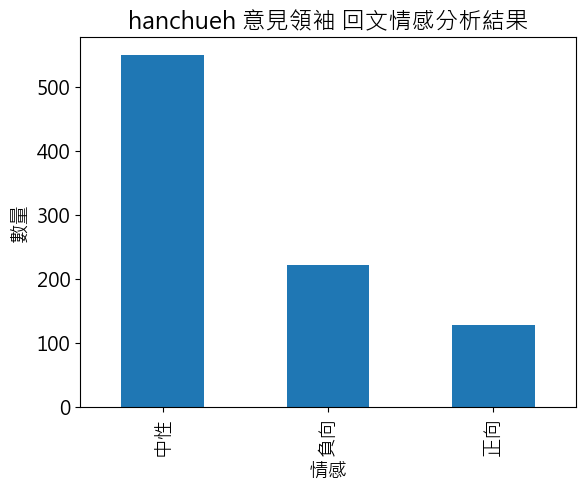

In [61]:
hanchueh_df = pd.read_csv('hanchueh_sentimenet0608.csv')
hanchueh_df.value_counts('LLM').plot(kind='bar',title='hanchueh 意見領袖 回文情感分析結果',xlabel='情感',ylabel='數量')

# RAG

### HuggingFace Token

In [3]:
HUGGINGFACEHUB_API_TOKEN = " 使用你的KEY "
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

### 載入 LLM 模型

In [4]:
quant_config = BitsAndBytesConfig(load_in_4bit=True)

print(quant_config.is_quantizable())
print(quant_config.quantization_method())

True
fp4


In [5]:
model_id = "google/gemma-1.1-7b-it"

tokenizer = AutoTokenizer.from_pretrained(model_id, token=HUGGINGFACEHUB_API_TOKEN)
# device_map="auto" 使用 GPU 加速
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", quantization_config=quant_config, token=HUGGINGFACEHUB_API_TOKEN)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=300)
llm = HuggingFacePipeline(pipeline=pipe)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/ken/anaconda3/envs/SMA/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the from rom langchain-huggingface package and should be used instead. To use it run `pip install -U from rom langchain-huggingface` and import as `from from rom langchain_huggingface import llms import HuggingFacePipeline`.
  warn_deprecated(


In [6]:
# repo_id: HuggingFace 上的模型名稱，本範例使用 gemma 7b instruct 版本
    # huggingface: https://huggingface.co/google/gemma-1.1-7b-it
# temperature: 模型回答的活潑程度，0~1 越大每次回答的多樣性越高

llm = HuggingFaceEndpoint(
    repo_id="google/gemma-1.1-7b-it", temperature=1.0,model_kwargs={'token':HUGGINGFACEHUB_API_TOKEN, 'use_cache':False}
)
llm.invoke("你好，自然語言處理有什麼相關應用？")

/home/ken/anaconda3/envs/SMA/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEndpoint` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the from langchain-huggingface package and should be used instead. To use it run `pip install -U from langchain-huggingface` and import as `from from langchain_huggingface import llms import HuggingFaceEndpoint`.
  warn_deprecated(


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/ken/.cache/huggingface/token
Login successful


'\n\n**自然語言處理有以下相關應用：**\n\n**1. 語言理解與生成**\n\n* 自然語言理解（NLU）：理解人類語言的含義和語意。\n* 自然語言生成（NLG）：根據特定資料和情境生成人類語言。\n\n\n**2. 機器翻譯**\n\n* 自動翻譯文本和語音，以多種語言之間進行交流。\n\n\n**3. 情緒分析**\n\n* 分析文本或語音內容的情緒或情緒傾向。\n\n\n**4. 文本摘要**\n\n* 從大量文本中提取主要內容。\n\n\n**5. 情感偵測**\n\n* 根據文本或語音內容偵測情緒，例如情緒、積極或消極。\n\n\n**6. 語言轉換**\n\n* 將一種語言中的文本轉換為另一種語言。\n\n\n**7. 文章推薦**\n\n* 基於個人興趣和喜好推薦文章或內容。\n\n\n**8. 聊天機器人**\n\n* 建立與使用者互動的聊天機器人。\n\n\n**9. 文字建議**\n\n* 提供詞彙和語法建議。\n\n\n**10. 誤字檢查**\n\n* 自動檢查並修正文字中的誤字。\n\n\n**自然語言處理的應用範圍非常廣，並隨著技術的進步而不斷擴大。**'

In [7]:
llm.invoke("你好，自然語言處理有什麼相關應用？")

'\n\n**自然語言處理有以下相關應用：**\n\n* **語義分析：**理解文字的含義和情感。\n* **情感分析：**根據文字內容判斷情感趨勢。\n* **語法分析：**分析句子結構和語法規則。\n* **機器翻譯：**將文字從一種語言翻譯到另一種語言。\n* **詞彙建立：**建立詞彙庫和詞彙相關性。\n* **語音處理：**處理和理解語音信號。\n\n**這些應用在以下領域有廣泛的應用：**\n\n* **行銷：**內容行銷、廣告詞彙建立。\n* **娛樂：**語音助理、情感分析。\n* **健康照護：**病症診斷、情緒監測。\n* **教育：**語義分析、詞彙建立。\n* **政府：**機率翻譯、語音處理。\n\n**自然語言處理還有其他一些應用，例如：**\n\n* **新聞與報業：**自動摘要、情感分析。\n* **社會媒體：**內容分析、使用者行為分析。\n* **客戶服務：**自動回覆、語音轉文字。\n\n**自然語言處理的發展將會帶動更多新應用和技術，以更有效地理解和使用人類語言。**'

## 資料集實作 Information Extraction (Tagging)
- https://python.langchain.com/docs/use_cases/tagging/

載入第一個資料集

In [8]:
df = pd.read_csv("./data/car.csv")
df

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
1             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
2             3  https://www.ptt.cc/bbs/car/M.1685929883.A.655....   
3             4  https://www.ptt.cc/bbs/car/M.1685931309.A.75E....   
4             5  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....   
...         ...                                                ...   
8458       8459  https://www.ptt.cc/bbs/car/M.1717516269.A.9E5....   
8459       8460  https://www.ptt.cc/bbs/car/M.1717517574.A.A38....   
8460       8461  https://www.ptt.cc/bbs/car/M.1717518218.A.F7C....   
8461       8462  https://www.ptt.cc/bbs/car/M.1717518775.A.E0B....   
8462       8463  https://www.ptt.cc/bbs/car/M.1717518850.A.9C4....   

                       artTitle              artDate     artPoster  \
0     Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39    Subaru5566   
1                          [分享]  2023-06-05 07:28:38       sazabik   
2      Re:[問題]Lexus是不保值還是只有這車款？  2023-06-05 09:51:21  jimmycatmeow   
3                  [討論]該選那一台車呢？  2023-06-05 10:15:06    appledavid   
4         [新聞]BMWi純電大軍台灣銷售持續奪冠！  2023-06-05 10:49:32   david841015   
...                         ...                  ...           ...   
8458   [新聞]奧迪A5自撞四輪朝天居民盼加強取締改裝車  2024-06-04 23:51:04    hvariables   
8459    Re:[心得]他國事務FL5TypeR周年心得  2024-06-05 00:12:49        ttccnn   
8460    Re:[新聞]日本車廠「數據造假」多車款勒令停  2024-06-05 00:23:36      MarcTSLC   
8461   Re:[閒聊]subaru這牌子是發生什麼事了？  2024-06-05 00:32:53      kimisawa   
8462      [問題]對岸別克純電平台的電動車E4或E5  2024-06-05 00:34:08        hljjun   

     artCatagory                                         artContent  \
0            car  看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
1            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
2            car  我怎麼覺得相反….我2021年買最基礎版豪華訂價169折完價149。現在開了15000公里，...   
3            car  PRIUS , MODEL Y LONG RANGE , BZ4X\n\n下面是我簡單分析\...   
4            car  原文連結：\nhttps://racingcharger.tw/?p=40105\n原文內容...   
...          ...                                                ...   
8458         car  https://news.ltn.com.tw/news/Kaohsiung/breakin...   
8459         car  男人要說到做到 不能只剩一張嘴\n\n某天在論壇跟facebook上看到一組滿新的VOLK ...   
8460         car  昨天看到這篇新聞以後，我就想從各大媒體中，找這些品牌到底造假了什麼東西，畢竟這一\n次的風波...   
8461         car  我上週出差，Hertz給我一台 7人座的 ascent.\n開起來到蠻好開的。但我最不能接受...   
8462         car  如題\n\n聽說板上有些人喜歡說對岸的電動車是移動火葬場\n\n但美國別克在對岸推出的純電平...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
1     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...   36.230.135.169   
2     [{"cmtStatus": "推", "cmtPoster": "chingyun8245...  114.136.119.240   
3     [{"cmtStatus": "→", "cmtPoster": "appledavid",...             None   
4     [{"cmtStatus": "推", "cmtPoster": "lota", "cmtC...  111.240.103.113   
...                                                 ...              ...   
8458  [{"cmtStatus": "推", "cmtPoster": "kutkin", "cm...   61.230.132.222   
8459  [{"cmtStatus": "推", "cmtPoster": "gx9900824", ...     65.132.85.34   
8460  [{"cmtStatus": "推", "cmtPoster": "casco5566", ...   114.136.235.63   
8461  [{"cmtStatus": "推", "cmtPoster": "WiLLSTW", "c...    172.56.187.70   
8462  [{"cmtStatus": "→", "cmtPoster": "cityport", "...   111.251.185.24   

             insertedDate dataSource  
0     2023-06-06 01:05:00        ptt  
1     2023-06-06 01:05:00        ptt  
2     2023-06-06 01:05:00        ptt  
3     2023-06-06 01:05:00        ptt  
4     2023-06-06 01:05:00        ptt  
...                   ...        ...  
8458  2024-06-05 01:05:17        ptt  
8459  2024-06-05 01:05:17        ptt  
8460  2024-06-05 01:05:17        ptt  
8461  2024-06-05 01:05:17        ptt  
8462  2024-06-05 01:05:18        ptt  

[8463 rows x 11 columns]

載入第二個資料集

In [9]:
df_1 = pd.read_csv("./data/car_shp.csv")
df_1

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/CarShop/M.1685895936.A....   
1             2  https://www.ptt.cc/bbs/CarShop/M.1685900514.A....   
2             3  https://www.ptt.cc/bbs/CarShop/M.1685926294.A....   
3             4  https://www.ptt.cc/bbs/CarShop/M.1685931710.A....   
4             5  https://www.ptt.cc/bbs/CarShop/M.1685931998.A....   
...         ...                                                ...   
3871       3872  https://www.ptt.cc/bbs/CarShop/M.1717582417.A....   
3872       3873  https://www.ptt.cc/bbs/CarShop/M.1717590915.A....   
3873       3874  https://www.ptt.cc/bbs/CarShop/M.1717595786.A....   
3874       3875  https://www.ptt.cc/bbs/CarShop/M.1717596400.A....   
3875       3876  https://www.ptt.cc/bbs/CarShop/M.1717597353.A....   

                                artTitle              artDate     artPoster  \
0          [售車]2013VolvoS60T4R版套件、高里程、AC  2023-06-05 00:25:34      jaroslaw   
1             [售車]降價重PO2020FabiaCombi菁英版  2023-06-05 01:41:52        b09897   
2              Re:[售車]2019Mazda6wagon2.0  2023-06-05 08:51:31         addor   
3              [售車]2019年BMW330imsportG20  2023-06-05 10:21:47     alex80349   
4                  [售車]AUDITTMK12003紅色自排  2023-06-05 10:26:35           cmq   
...                                  ...                  ...           ...   
3871                 [售車]2005Toyotaaltis  2024-06-05 18:13:35     a37636462   
3872                     [售車]focus5D2021  2024-06-05 20:35:13    heyheyyou2   
3873             [售車]2015Mazda34D魂動紅(降價)  2024-06-05 21:56:24  Undiscovered   
3874  [售車]自售2019SubaruForester2.0i-SEyes  2024-06-05 22:06:38        waddie   
3875       [售車]2022年出廠SkodaKodiaq5+21.5t  2024-06-05 22:22:31        a90610   

     artCatagory                                         artContent  \
0        CarShop  車輛品牌/產地/出廠年月：Volvo/2013\n\n車款型式/排氣量：V60 T4 正13...   
1        CarShop  車輛品牌/產地/出廠年月：Skoda / 2020年12月\n\n車款型式/排氣量：Fabi...   
2        CarShop  (誤發回文抱歉版友們)\n\n您好，想請問mazda6 wagon賣出了嗎?\n\n如尚未賣...   
3        CarShop  [售車] 2019年 BMW 330i msport G20\n\nBMW 330i msp...   
4        CarShop  車輛品牌/產地/出廠年月：2003出廠2004掛排末代MK1\n\n車款型式/排氣量：17X...   
...          ...                                                ...   
3871     CarShop  車輛品牌/出廠年月：Toyota altis 2005年3月\n\n排氣量：1794 c.c...   
3872     CarShop  車輛品牌/產地/出廠年月：　2021年01月\n\n車款型式/排氣量：focus5D 202...   
3873     CarShop  車輛品牌/產地/出廠年月：Mazda/日本/2014年12月\n\n\n\n車款型式/排氣量...   
3874     CarShop  車輛品牌/產地/出廠年月：2019 Subaru Forester 2.0 i-S Eyes...   
3875     CarShop  Skoda Kodiaq 1.5t/捷克/出廠年份：2022年O5月\n\nKodiaq/排...   

                                             artComment            e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "hao909090", ...    1.174.203.34   
1     [{"cmtStatus": "推", "cmtPoster": "REALJOINGO",...  114.43.132.159   
2     [{"cmtStatus": "推", "cmtPoster": "d8822426", "...  180.217.59.115   
3     [{"cmtStatus": "推", "cmtPoster": "a865201233",...   220.142.47.23   
4                                                    []    36.225.89.70   
...                                                 ...             ...   
3871                                                 []   42.72.205.103   
3872  [{"cmtStatus": "→", "cmtPoster": "morrishh", "...    219.84.56.29   
3873                                                 []   118.170.26.61   
3874                                                 []   1.160.101.203   
3875  [{"cmtStatus": "→", "cmtPoster": "toasl", "cmt...  220.142.36.208   

             insertedDate dataSource  
0     2023-06-05 01:05:39        ptt  
1     2023-06-06 01:05:36        ptt  
2     2023-06-06 01:05:36        ptt  
3     2023-06-06 01:05:36        ptt  
4     2023-06-06 01:05:36        ptt  
...                   ...        ...  
3871  2024-06-06 01:05:37        ptt  
3872  2024-06-06 01:05:37        ptt  
3873  2024-06-06 01:05:37        ptt  
3874  2024-06-06 01:05:37        ptt  
3875  2024-06-06 01:05:37        

合併資料集

In [11]:
merged_df = pd.concat([df, df_1])
merged_df

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
1             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
2             3  https://www.ptt.cc/bbs/car/M.1685929883.A.655....   
3             4  https://www.ptt.cc/bbs/car/M.1685931309.A.75E....   
4             5  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....   
...         ...                                                ...   
3871       3872  https://www.ptt.cc/bbs/CarShop/M.1717582417.A....   
3872       3873  https://www.ptt.cc/bbs/CarShop/M.1717590915.A....   
3873       3874  https://www.ptt.cc/bbs/CarShop/M.1717595786.A....   
3874       3875  https://www.ptt.cc/bbs/CarShop/M.1717596400.A....   
3875       3876  https://www.ptt.cc/bbs/CarShop/M.1717597353.A....   

                                artTitle              artDate     artPoster  \
0              Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39    Subaru5566   
1                                   [分享]  2023-06-05 07:28:38       sazabik   
2               Re:[問題]Lexus是不保值還是只有這車款？  2023-06-05 09:51:21  jimmycatmeow   
3                           [討論]該選那一台車呢？  2023-06-05 10:15:06    appledavid   
4                  [新聞]BMWi純電大軍台灣銷售持續奪冠！  2023-06-05 10:49:32   david841015   
...                                  ...                  ...           ...   
3871                 [售車]2005Toyotaaltis  2024-06-05 18:13:35     a37636462   
3872                     [售車]focus5D2021  2024-06-05 20:35:13    heyheyyou2   
3873             [售車]2015Mazda34D魂動紅(降價)  2024-06-05 21:56:24  Undiscovered   
3874  [售車]自售2019SubaruForester2.0i-SEyes  2024-06-05 22:06:38        waddie   
3875       [售車]2022年出廠SkodaKodiaq5+21.5t  2024-06-05 22:22:31        a90610   

     artCatagory                                         artContent  \
0            car  看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
1            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
2            car  我怎麼覺得相反….我2021年買最基礎版豪華訂價169折完價149。現在開了15000公里，...   
3            car  PRIUS , MODEL Y LONG RANGE , BZ4X\n\n下面是我簡單分析\...   
4            car  原文連結：\nhttps://racingcharger.tw/?p=40105\n原文內容...   
...          ...                                                ...   
3871     CarShop  車輛品牌/出廠年月：Toyota altis 2005年3月\n\n排氣量：1794 c.c...   
3872     CarShop  車輛品牌/產地/出廠年月：　2021年01月\n\n車款型式/排氣量：focus5D 202...   
3873     CarShop  車輛品牌/產地/出廠年月：Mazda/日本/2014年12月\n\n\n\n車款型式/排氣量...   
3874     CarShop  車輛品牌/產地/出廠年月：2019 Subaru Forester 2.0 i-S Eyes...   
3875     CarShop  Skoda Kodiaq 1.5t/捷克/出廠年份：2022年O5月\n\nKodiaq/排...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
1     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...   36.230.135.169   
2     [{"cmtStatus": "推", "cmtPoster": "chingyun8245...  114.136.119.240   
3     [{"cmtStatus": "→", "cmtPoster": "appledavid",...             None   
4     [{"cmtStatus": "推", "cmtPoster": "lota", "cmtC...  111.240.103.113   
...                                                 ...              ...   
3871                                                 []    42.72.205.103   
3872  [{"cmtStatus": "→", "cmtPoster": "morrishh", "...     219.84.56.29   
3873                                                 []    118.170.26.61   
3874                                                 []    1.160.101.203   
3875  [{"cmtStatus": "→", "cmtPoster": "toasl", "cmt...   220.142.36.208   

             insertedDate dataSource  
0     2023-06-06 01:05:00        ptt  
1     2023-06-06 01:05:00        ptt  
2     2023-06-06 01:05:00        ptt  
3     2023-06-06 01:05:00        ptt  
4     2023-06-06 01:05:00        ptt  
...                   ...        ...  
3871  2024-06-06 01:05:37        ptt  
3872  2024-06-06 01:05:37        ptt  
3873  2024-06-06 01:05:37        ptt  
3874  2024-06-06 01:05:37        ptt  
3875  2024-06-06 01:0

In [12]:
df = merged_df
df

system_id                                             artUrl  \
0             1  https://www.ptt.cc/bbs/car/M.1685903561.A.1E0....   
1             2  https://www.ptt.cc/bbs/car/M.1685921320.A.B3F....   
2             3  https://www.ptt.cc/bbs/car/M.1685929883.A.655....   
3             4  https://www.ptt.cc/bbs/car/M.1685931309.A.75E....   
4             5  https://www.ptt.cc/bbs/car/M.1685933451.A.C06....   
...         ...                                                ...   
3871       3872  https://www.ptt.cc/bbs/CarShop/M.1717582417.A....   
3872       3873  https://www.ptt.cc/bbs/CarShop/M.1717590915.A....   
3873       3874  https://www.ptt.cc/bbs/CarShop/M.1717595786.A....   
3874       3875  https://www.ptt.cc/bbs/CarShop/M.1717596400.A....   
3875       3876  https://www.ptt.cc/bbs/CarShop/M.1717597353.A....   

                                artTitle              artDate     artPoster  \
0              Re:[討論]LUXGEN害台灣人買車多花幾十萬？  2023-06-05 02:32:39    Subaru5566   
1                                   [分享]  2023-06-05 07:28:38       sazabik   
2               Re:[問題]Lexus是不保值還是只有這車款？  2023-06-05 09:51:21  jimmycatmeow   
3                           [討論]該選那一台車呢？  2023-06-05 10:15:06    appledavid   
4                  [新聞]BMWi純電大軍台灣銷售持續奪冠！  2023-06-05 10:49:32   david841015   
...                                  ...                  ...           ...   
3871                 [售車]2005Toyotaaltis  2024-06-05 18:13:35     a37636462   
3872                     [售車]focus5D2021  2024-06-05 20:35:13    heyheyyou2   
3873             [售車]2015Mazda34D魂動紅(降價)  2024-06-05 21:56:24  Undiscovered   
3874  [售車]自售2019SubaruForester2.0i-SEyes  2024-06-05 22:06:38        waddie   
3875       [售車]2022年出廠SkodaKodiaq5+21.5t  2024-06-05 22:22:31        a90610   

     artCatagory                                         artContent  \
0            car  看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...   
1            car  大家都在分享菜單與車輛的同時，我也來分享特斯拉針對車主推出的APP內容。\n\n跟傳統汽車只...   
2            car  我怎麼覺得相反….我2021年買最基礎版豪華訂價169折完價149。現在開了15000公里，...   
3            car  PRIUS , MODEL Y LONG RANGE , BZ4X\n\n下面是我簡單分析\...   
4            car  原文連結：\nhttps://racingcharger.tw/?p=40105\n原文內容...   
...          ...                                                ...   
3871     CarShop  車輛品牌/出廠年月：Toyota altis 2005年3月\n\n排氣量：1794 c.c...   
3872     CarShop  車輛品牌/產地/出廠年月：　2021年01月\n\n車款型式/排氣量：focus5D 202...   
3873     CarShop  車輛品牌/產地/出廠年月：Mazda/日本/2014年12月\n\n\n\n車款型式/排氣量...   
3874     CarShop  車輛品牌/產地/出廠年月：2019 Subaru Forester 2.0 i-S Eyes...   
3875     CarShop  Skoda Kodiaq 1.5t/捷克/出廠年份：2022年O5月\n\nKodiaq/排...   

                                             artComment             e_ip  \
0     [{"cmtStatus": "推", "cmtPoster": "TopGun2", "c...  121.165.101.221   
1     [{"cmtStatus": "推", "cmtPoster": "zzzyyan", "c...   36.230.135.169   
2     [{"cmtStatus": "推", "cmtPoster": "chingyun8245...  114.136.119.240   
3     [{"cmtStatus": "→", "cmtPoster": "appledavid",...             None   
4     [{"cmtStatus": "推", "cmtPoster": "lota", "cmtC...  111.240.103.113   
...                                                 ...              ...   
3871                                                 []    42.72.205.103   
3872  [{"cmtStatus": "→", "cmtPoster": "morrishh", "...     219.84.56.29   
3873                                                 []    118.170.26.61   
3874                                                 []    1.160.101.203   
3875  [{"cmtStatus": "→", "cmtPoster": "toasl", "cmt...   220.142.36.208   

             insertedDate dataSource  
0     2023-06-06 01:05:00        ptt  
1     2023-06-06 01:05:00        ptt  
2     2023-06-06 01:05:00        ptt  
3     2023-06-06 01:05:00        ptt  
4     2023-06-06 01:05:00        ptt  
...                   ...        ...  
3871  2024-06-06 01:05:37        ptt  
3872  2024-06-06 01:05:37        ptt  
3873  2024-06-06 01:05:37        ptt  
3874  2024-06-06 01:05:37        ptt  
3875  2024-06-06 01:0

In [13]:
len(df["artContent"])

12339

In [14]:
df["artContent"][0]

0    看到你這理由，火氣就上來了。\nhttps://ctee.com.tw/news/indus...
0    車輛品牌/產地/出廠年月：Volvo/2013\n\n車款型式/排氣量：V60 T4 正13...
Name: artContent, dtype: object

對合併後的資料集前處理

In [16]:
df["artDate"] = pd.to_datetime(df["artDate"])
df['artDate'] = df['artDate'].dt.date

clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)
# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sampled_df = sent_df.sample(n=len(sent_df), random_state=222) #完整使用所有資料

sampled_df

artUrl  \
50562   https://www.ptt.cc/bbs/car/M.1697695856.A.5A1....   
123087  https://www.ptt.cc/bbs/car/M.1711803794.A.FE4....   
194064  https://www.ptt.cc/bbs/CarShop/M.1713335985.A....   
179686  https://www.ptt.cc/bbs/CarShop/M.1704355342.A....   
136408  https://www.ptt.cc/bbs/car/M.1715091718.A.80B....   
...                                                   ...   
22237   https://www.ptt.cc/bbs/car/M.1690548079.A.971....   
106019  https://www.ptt.cc/bbs/car/M.1708495722.A.7CF....   
24115   https://www.ptt.cc/bbs/car/M.1690847784.A.FCE....   
124256  https://www.ptt.cc/bbs/car/M.1712077289.A.769....   
199094  https://www.ptt.cc/bbs/CarShop/M.1716112608.A....   

                                   artTitle     artDate  \
50562   [新聞]改朝換代有望？Mazda6傳將以直六、後驅平台邁入次世代革新！  2023-10-19   
123087                  [問題]為什麼和泰沒有0w16的機油？  2024-03-30   
194064              [售車]2009SuzukiSX4(五門)白色  2024-04-17   
179686   [售車](代PO)TOYOTACorollaALTIS4D1.8鐵灰  2024-01-04   
136408          [情報]特斯拉Cybertruck防彈卻不防水？　洗車  2024-05-07   
...                                     ...         ...   
22237                    [菜單]RX350豪華版/X320i  2023-07-28   
106019    [新聞]VolkswagenT-Cross改款上市優惠價88.8萬  2024-02-21   
24115                  [菜單]ToyotaRAV4汽油旗艦請益  2023-08-01   
124256          [心得]AudiMMI更新-地下室無訊號MMI失效改善  2024-04-03   
199094               [售車]2010年NISSANTIIDA4D  2024-05-19   

                                               artContent  \
50562   原文連結：\nhttps://autos.udn.com/autos/story/7826/...   
123087  明明Toyota的油電車\n\n用0w16的機油是最好的選擇\n\n全世界的Toyota油電...   
194064  車輛品牌/產地/出廠年月：　2009年4月\n\n車款型式/排氣量：1.6\n\n顏色/排檔...   
179686  車輛品牌/產地/出廠年月：　2011年06月\n\n車款型式/排氣量：1798\n\n顏色/...   
136408  特斯拉cybertruck洗車會大當機\n這樣特斯拉洗車會不會漏電啊?\n感覺好危險\n建議...   
...                                                   ...   
22237   (1)\n車輛廠牌/年份/型號：BMW 2023 X3 白\n\n車輛原廠編成等級：X3 2...   
106019  原文連結：\nhttps://racingcharger.tw/?p=46807\n原文內容...   
24115   車輛廠牌/年份/型號：Toyota/2023/2.0汽油\n車輛原廠編成等級：旗艦\n是否含...   
124256  奧迪的MMI在地下室無訊號的地方，很容易在發動當下車機卡死無回應\n\n基本上都要回到有訊號...   
199094  車輛品牌/出廠年月：NISSAN 2010年\n\n車款型式/排氣量：TIIDA 4D 16...   

                                                 sentence  
50562                                 Mazda 6 將會以全新技術平台回歸  
123087                                   為什麼和泰就是不賣0w16的機油  
194064                                          更換了許多重要零件  
179686                             有無調表/實際里程：無調表/79000 KM  
136408                                  只因為發現一個與油門踏板有關的缺陷  
...                                                   ...  
22237                                      下訂日期範圍：2023年5月  
106019                                      很多人都直接買T-Roc了  
24115   車輛廠牌/年份/型號：Toyota/2023/2.0汽油車輛原廠編成等級：旗艦是否含保險：不...  
124256                                                 總之  
199094                             車輛品牌/出廠年月：NISSAN 2010年  

[310 rows x 5 columns]

In [18]:
sampled_df["artContent"]

50562     原文連結：\nhttps://autos.udn.com/autos/story/7826/...
123087    明明Toyota的油電車\n\n用0w16的機油是最好的選擇\n\n全世界的Toyota油電...
194064    車輛品牌/產地/出廠年月：　2009年4月\n\n車款型式/排氣量：1.6\n\n顏色/排檔...
179686    車輛品牌/產地/出廠年月：　2011年06月\n\n車款型式/排氣量：1798\n\n顏色/...
136408    特斯拉cybertruck洗車會大當機\n這樣特斯拉洗車會不會漏電啊?\n感覺好危險\n建議...
                                ...                        
22237     (1)\n車輛廠牌/年份/型號：BMW 2023 X3 白\n\n車輛原廠編成等級：X3 2...
106019    原文連結：\nhttps://racingcharger.tw/?p=46807\n原文內容...
24115     車輛廠牌/年份/型號：Toyota/2023/2.0汽油\n車輛原廠編成等級：旗艦\n是否含...
124256    奧迪的MMI在地下室無訊號的地方，很容易在發動當下車機卡死無回應\n\n基本上都要回到有訊號...
199094    車輛品牌/出廠年月：NISSAN 2010年\n\n車款型式/排氣量：TIIDA 4D 16...
Name: artContent, Length: 310, dtype: object

### 1. 使用文章內容

- 將文檔轉換為 embedding
- 存入 vectorDB

In [19]:
# 清洗數據，將非字串的項目轉換為字串
sampled_df['artContent'] = sampled_df['artContent'].astype(str)

# 初始化Embeddings函數
embedding_function = SentenceTransformerEmbeddings(model_name="lier007/xiaobu-embedding")

# 將 artContent 欄位轉為列表
documents = sampled_df["artContent"].tolist()

# 建立向量儲存庫
vectorstore = Chroma.from_texts(texts=documents, embedding=embedding_function)

# 設置檢索器
retriever = vectorstore.as_retriever()

/home/ken/anaconda3/envs/SMA/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


測試找尋相關文檔

In [20]:
# query it
query = "電動車的評價如何"
docs = vectorstore.similarity_search(query)

# print results
print(docs[0].page_content)

一看就知道樓主沒開過電車...

  也不懂大陸的電車情況

  說實在一點 電車技術大概在一百年前就已經出來了，主體架構根本沒啥變化

  現在大陸無論是純電 DMI 增程 其實技術來源不外乎幾個

     1.MUSK開源的技術

     2.日本玩剩的混動技術

  那個吹上天的DMI 基本上就是被日本淘汰然後轉售賣給BYD的古董技術

  然後BYD在這個基礎上魔改 犧牲了很多 車內空間 安全性等等

  你說她跑得遠 怎不去看他的油箱多大 你說她賣的便宜 怎不去看她底盤跟用料

  大陸的車現在基本上潰縮 吸能 幾乎沒有，

  一旦撞擊就是靠車體硬剛 電車就還會附帶起火

  日本車的全新技術就會用整車的設計來吸收撞擊的衝擊力，

  兩者間的設計理念根本差異至少半個世紀...


      現在大陸的新能源車（綠牌 包含 純電 混動 增程等），價位從

  最便宜的五萬rmb--miniEV 一直到最高級的百萬rmb byd的仰望

  中等價位的理想 問界等。 整體來說都是噱頭居多

  賣車的不賣車 賣啥冰箱彩電大沙發 仰望還能當船開 頭上還有無人機平台

  剩下沒有冰箱彩電的 就吹智能駕駛 如:問界...

  其實開過得都知道，智能駕駛目前就是一個噱頭 沒啥用

  市區開的亂七八糟 又不能車位到車位，高速上面也不能睡覺

  沒啥用真的....

      嚴格來說吹噓這些車 還不如好好賺錢 買一台飛度 才是真正的好....

  阿悶....
恩...您開過這些車嘛？
開卷考試誰不會，重點再有沒有認真思考真實的使用環境

  靠車體硬剛，只要塞對地方 測試一定滿分 換個角度試試看你就知道了

  另外，行人跟其他行路人的安全你有沒有考量 車身不吸能 不潰縮

  表示對於行人這車，根本就是移動的死亡陷阱...

  你用車不考慮其他用路人的安全嘛？
我是支持小酸奶的...


定義 RAG prompt 與 chain

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_prompt_templete = """<start_of_turn>user
"角色": "專業的汽車評論機器人",
"服務內容":
你是一個樂於回答問題的機器人，關於汽車的問題你都可以依照以下文件中的規定來回答。\n
現在給予以下相關文件, 你將會基於以下 [文件][文件] 中的相關文件與 [回答規則][回答規則] 中的回答規則來回答問題。\n
\n
[文件]
{context}
[文件]
\n
[回答規則]
只依據 [文件][文件] 中提供的資訊來回答，並且遵照下列的幾點規則：
- 不撒謊或幻想 [文件][文件] 中未明確提供的答案
- 如果不確定答案或答案未明確包含在 [文件][文件] 中，請回答：“我很抱歉，我不知道如何提供幫助。”
- 回答簡短、相關且簡潔的答案
- 回答字數請少於 150 個字
- 請在 [結果]: 之後回答你的答案
[回答規則]

<</SYS>>
現在，基於上述的文件與規則，回答以下 () 中的問題\n[使用者]:({question})\n<end_of_turn>
<start_of_turn>model[結果]:"""

rag_prompt = PromptTemplate.from_template(rag_prompt_templete)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)
rag_chain.get_graph().print_ascii()

              +---------------------------------+           
              | Parallel<context,question>Input |           
              +---------------------------------+           
                    ****                ****                
                 ***                        ***             
               **                              ***          
+----------------------+                          **        
| VectorStoreRetriever |                           *        
+----------------------+                           *        
            *                                      *        
            *                                      *        
            *                                      *        
+---------------------+                     +-------------+ 
| Lambda(format_docs) |                     | Passthrough | 
+---------------------+                     +-------------+ 
                    ****                ****                
                        

In [25]:
rag_chain.invoke("電動車的評價如何 條列說明")

'\n\n電動車的評價如何 條列說明？\n\n根據文件內容，電動車的評價主要圍繞以下幾個方面：\n\n* **工作週期與負載條件設定:** 工作週期會考慮電池系統的壽命，並避免過度設計，以降低成本。然而，在設定工作週期的負載條件時，則要根據整車日常使用的駕駛模式來計算功率需求，並設定適合的負載條件。\n* **電池系統壽命:** 電池系統由電芯、模組和電池組等組成，並會受電芯間的差異、極片阻抗和電池位置分布等因素影響。這些因素會影響電池系統的壽命，並需要對電芯進行良率高且品質穩定的控制。'

In [26]:
rag_chain.invoke("中國電車評價如何")

' 根據文件內容，中國電車的評價存在爭議。一些資料顯示中國電車存在自燃等安全問題，而其他資料則稱中國電車的技術不斷進步，並有強烈的發展趨勢。最終的評價取決於個人價值觀和風險評估。'

In [27]:
rag_chain.invoke("目前哪一款汽車的評價、口碑最好")

' 基於提供的文件，豐田 Rav4 的評價與口碑非常高，其可靠性、功能和使用成本等方面都取得了良好的評價。'

In [28]:
rag_chain.invoke("台灣的汽車產業有優勢嗎")

' 根據文件內容，台灣的汽車產業存在優勢，但面臨競爭與市場趨勢的考驗。台灣的汽車產業具有高品質的製造業基礎，但其出口量和優勢則落後中國。然而，台灣的汽車產業應可以利用其優勢，引進外資或引進外國汽車品牌，以提高其競爭力。'

In [33]:
rag_chain.invoke("Mazda評價如何")

' 根據數據庫的內容，Mazda在安全、質感、配備和價格等方面都比差不多價位的車型有優勢，但排氣量和魔術小空間的缺點使其在一些方面沒有競爭力。'

In [35]:
rag_chain.invoke("100萬內的汽車有哪些車款式你最推薦的？")

' 根據文件中的資訊，100萬內的汽車中，我建議考慮 Toyota Crown Cross 或 Volvo XC40。這兩款車都備有安全機能和舒適性，並適合您的需求。'

### 2. 加入用戶回應 

增加更多的資料['artComment']

In [26]:
def batch_process(df, batch_size):
    for i in range(0, len(df), batch_size):
        yield df[i:i + batch_size]

batch_size = 10000


embedding_function = SentenceTransformerEmbeddings(model_name="lier007/xiaobu-embedding")

# 提前轉換和拼接
sampled_df['artContent'] = sampled_df['artContent'].astype(str)
sampled_df['artComment'] = sampled_df['artComment'].astype(str)
sampled_df['combinedContent'] = sampled_df.apply(lambda row: row['artContent'] + ' ' + row['artComment'], axis=1)

# 分批處理
for batch in batch_process(sampled_df, batch_size):
    documents = batch["combinedContent"].tolist()
    vectorstore = Chroma.from_texts(texts=documents, embedding=embedding_function)
    retriever = vectorstore.as_retriever()
    # 這裡可以添加處理每個批次的其他邏輯


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [145]:
rag_chain.invoke("台灣的汽車產業跟韓國比起來有優勢嗎")

' 根據文檔內容，台灣的汽車產業與韓國相比，在過去幾年有明顯的落後。韓國汽車產業以進口車款、技術發展和產品新研發等方面比台灣更進步。'

In [144]:
rag_chain.invoke("中國電車評價如何")

' 中國電車目前發展迅速，其技術和價格優勢使其在全球電車市場中佔有優勢，但同時也面臨一些挑戰，例如技術水平有待進步和價格仍然高。'

In [106]:
rag_chain.invoke("喜歡ix5的人也會討論什麼車，請簡短回答？")

' 根據文件內容，ix5 的擁戶們也會討論其他高階車款，例如 Tesla 等，因為 ix5 是在中高階車款中，所以他們的擁戶們對車款的比較會更廣泛。'

### 嘗試去找出某品牌的忠誠粉絲

In [101]:
rag_chain.invoke("可以幫我推薦出比較常給予台塑汽車意見的人嗎")

'\n根據 [文件] 中的留言，一些比較常給予台塑汽車意見的人是：fenderrb、hondasho 和 MTBF。他們在留言中提供了一些對台塑汽車的深入評量和意見。'

In [95]:
rag_chain.invoke("如果我今天要找出個cmtPoster很喜歡裕隆，請問是誰")

' 根據 [文件] 中的留言趨勢，那些對裕隆的評論者是 kabukiryu、venon0916 和 bationworm。他們在評論中表示對裕隆車款的喜好，以及對裕隆的服務和保固政策的滿意。'

In [89]:
rag_chain.invoke("幫我找出cmtContent中，最常被批評的品牌")

' 基於文件內容，最常被批評的品牌是台塑汽車。在留言中，有許多人批評台塑汽車的營運狀況不佳、產品品質不佳以及沒有出色的品牌代表性。'